In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import seaborn as sns
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
from arch import arch_model
warnings.filterwarnings("ignore")

In [2]:
evds=evdsAPI('dsIC3fiGlu')


In [3]:
import yfinance as yf 


In [4]:
usd=evds.get_data(["TP.DK.USD.S.YTL"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
usd.dropna(inplace=True)
usd.iloc[-1,1]=yf.download(tickers='USDTRY=X',interval='1m')["Adj Close"][-1]
usd

[*********************100%%**********************]  1 of 1 completed


,Tarih,TP_DK_USD_S_YTL
0,01-02-2006,1.32630
1,02-02-2006,1.32410
2,03-02-2006,1.32770
3,06-02-2006,1.32570
4,07-02-2006,1.32960
...,...,...
4690,24-01-2024,30.27300
4691,25-01-2024,30.26900
4692,26-01-2024,30.27300
4693,29-01-2024,30.28880


In [5]:
usd['Tarih'] = pd.to_datetime(usd['Tarih'], format='%d-%m-%Y')

# Tarihi indeks olarak ayarla
usd.set_index('Tarih', inplace=True)

# Aylık ortalama değerleri hesapla
usd = usd.resample('M').mean()

usd

,TP_DK_USD_S_YTL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-09-30,26.989448
2023-10-31,27.846114
2023-11-30,28.637082


In [6]:
enf=evds.get_data(["TP.FE.OKTG01"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"))
enf

,Tarih,TP_FE_OKTG01
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
210,2023-8,1614.31
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50


In [7]:

enf=pd.DataFrame(enf)
enf.columns=["Tarih","TÜFE"]


In [8]:

inflation=enf
inflation

,Tarih,TÜFE
0,2006-2,123.84
1,2006-3,124.18
2,2006-4,125.84
3,2006-5,128.20
4,2006-6,128.63
...,...,...
210,2023-8,1614.31
211,2023-9,1691.04
212,2023-10,1749.11
213,2023-11,1806.50


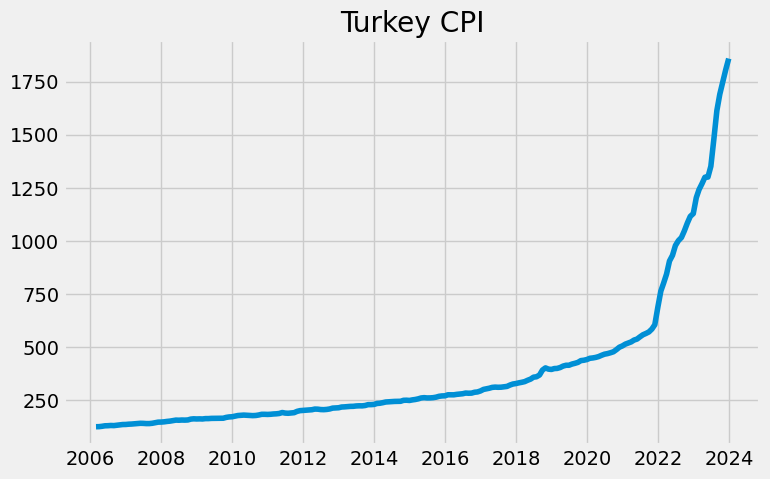

In [9]:
dates=pd.date_range(start="2006-02-28",periods=len(enf) , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)
plt.figure(figsize=(8,5))
plt.title("Turkey CPI")
plt.plot(df)
plt.show()


In [10]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["TP_DK_USD_S_YTL"]

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6

,USD/TL
Tarih,
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
2006-06-30,1.600536
...,...
2023-09-30,26.989448
2023-10-31,27.846114
2023-11-30,28.637082


In [11]:
money=evds.get_data(["TP.PR.ARZ13"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del money["YEARWEEK"]
money=pd.DataFrame(money)
money.columns=["Tarih","Para Arzi"]
money=money.set_index(pd.to_datetime(money["Tarih"], format='%d-%m-%Y'))
del money["Tarih"]
money=money.resample('M').last()
money=money.pct_change()*100
money=money.dropna()
money.iloc[-1,0]=1.8980
money

,Para Arzi
Tarih,
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2023-09-30,2.694232
2023-10-31,3.356297
2023-11-30,2.245991


In [12]:
m3=evds.get_data(["TP.PR.ARZ22"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del m3["Tarih"]
m3.columns=["M3 Para Arzi"]
m3=m3/1e+08
m3=m3.set_index(money.index)
m3

,M3 Para Arzi
Tarih,
2006-02-28,2.663248
2006-03-31,2.731552
2006-04-30,2.767716
2006-05-31,3.025340
2006-06-30,3.038097
...,...
2023-09-30,126.661059
2023-10-31,130.934676
2023-11-30,134.161244


In [13]:

issizlik=evds.get_data(["TP.TIG08"],startdate="28-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del issizlik["Tarih"]
issizlik.columns=["İşsizlik"]
issizlik=issizlik.dropna(axis=0)
issizlik=issizlik.set_index(pd.date_range(start="2014-01-30",periods=len(issizlik),freq="1M"))
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-07-31,9.3
2023-08-31,9.1
2023-09-30,9.0
2023-10-31,8.5


In [14]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2023-09-30,92.766499
2023-10-31,88.704091
2023-11-30,82.027727


In [15]:
kredi=evds.get_data(["TP.KREDI.L001"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=1)
del kredi["Tarih"]
del kredi["YEARWEEK"]
kredi=kredi.set_index(pd.date_range(start="2006-02-03",periods=len(kredi),freq="W"))
kredi.columns=["Kredi"]
kredi=(kredi.pct_change(4)*100).dropna()
kredi=kredi.resample('M').last()
kredi

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-09-30,2.412238
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464


In [16]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["Kredi"]
df3["TIME"]=pd.date_range(start="2006-03-28",periods=len(df3),freq="1M")
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3=df3.set_index(pd.date_range('2006-03-28',periods=len(df3) , freq='1M'))
df3

,Kredi
2006-03-31,4.327119
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.364474
2006-07-31,-0.493205
...,...
2023-09-30,2.412238
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464


In [17]:
pfaiz=evds.get_data(["TP.APIFON4"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
pfaiz.columns=["Tarih","Faiz"]
pfaiz.iloc[:11,1]=17.5
pfaiz.iloc[11:23,1]=21.5
pfaiz.iloc[23:35,1]=19.25
pfaiz.iloc[35:47,1]=10.25
pfaiz.iloc[47:59,1]=8
pfaiz["Faiz"]=pfaiz["Faiz"].astype(float)
#pfaiz.iloc[212,1]=35
pfaiz



,Tarih,Faiz
0,2006-2,17.50
1,2006-3,17.50
2,2006-4,17.50
3,2006-5,17.50
4,2006-6,17.50
...,...,...
211,2023-9,31.00
212,2023-10,33.00
213,2023-11,41.09
214,2023-12,42.50


In [18]:
dates=pd.date_range('2006-02-28',periods=len(pfaiz) , freq='1M')
pfaiz=pd.DataFrame(pfaiz)
pfaiz.columns=["Tarih","Politika Faizi"]
pfaiz["TIME"]=dates
pfaiz['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
pfaiz['TIME'] =  pd.to_datetime(pfaiz['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
pfaiz = pfaiz.set_index(['TIME'])
del pfaiz["Tarih"]
pfaiz

,Politika Faizi
TIME,
2006-02-28,17.50
2006-03-31,17.50
2006-04-30,17.50
2006-05-31,17.50
2006-06-30,17.50
...,...
2023-09-30,31.00
2023-10-31,33.00
2023-11-30,41.09


In [19]:
kfaiz=evds.get_data(["TP.KTFTUK"],startdate="01-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
del kfaiz["Tarih"]
del kfaiz["YEARWEEK"]
kfaiz=kfaiz.set_index(pd.date_range(start="2006-02-01",periods=len(kfaiz),freq="1W"))
kfaiz=kfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])
kfaiz.columns=["Kredi Faizi"]
kfaiz

,Kredi Faizi
2006-02-28,17.02
2006-03-31,16.88
2006-04-30,15.84
2006-05-31,16.60
2006-06-30,20.35
...,...
2023-09-30,57.56
2023-10-31,58.43
2023-11-30,58.61
2023-12-31,58.16


In [20]:
perakende=pd.read_excel("./perakende satis hacim endeksi ve degisim oranlari (sabit fiyatlarla) (2015=100).xls")
perakende1=perakende.iloc[5:,2].dropna(axis=0).astype(float)
perakende1=pd.DataFrame(perakende1)
perakende1.columns=["Arındırılmamış"]


perakende1["Takvimden Arındırılmış"]=perakende.iloc[5:,4].astype(float)
perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]=perakende.iloc[5:,7].astype(float)
perakende1=perakende1.set_index(pd.date_range(start="2010-01-01",periods=len(perakende1),freq="1M"))
perakende1

,Arındırılmamış,Takvimden Arındırılmış,Mevsimsellikten ve Takvimden Arındırılmış
2010-01-31,57.403841,57.747949,67.560585
2010-02-28,57.317027,57.179176,68.192727
2010-03-31,67.904361,67.034985,69.536955
2010-04-30,67.048510,66.458455,70.175625
2010-05-31,70.327428,70.614865,70.604236
...,...,...,...
2023-06-30,180.070938,186.192371,179.437348
2023-07-31,191.652101,194.142558,184.796934
2023-08-31,185.107822,183.341634,176.289202
2023-09-30,184.891859,183.368030,175.221191


In [21]:
motorin=pd.read_excel("./motorin.xlsx")
motorin.columns=["Tarih","Motorin"]
motorin=motorin.set_index(pd.date_range(start="2003-01-01",periods=len(motorin),freq="1M"))
del motorin["Tarih"]
motorin=motorin.astype(float)
motorin

,Motorin
2003-01-31,1.366645
2003-02-28,1.457199
2003-03-31,1.529555
2003-04-30,1.439813
2003-05-31,1.404363
...,...
2023-09-30,39.180000
2023-10-31,38.900000
2023-11-30,37.680000
2023-12-31,36.420000


In [22]:
sanayi=pd.read_excel("./sanayi uretim endeksi ve degisim oranlari (2015=100).xls")
sanayi=pd.DataFrame(sanayi.iloc[8:,5])
sanayi.columns=["Sanayi"]
sanayi=sanayi.set_index(pd.date_range(start="2005-02-08",periods=len(sanayi),freq="1M"))
sanayi=sanayi.dropna()
sanayi=sanayi.astype(float)
sanayi

,Sanayi
2005-02-28,57.747916
2005-03-31,57.058754
2005-04-30,57.685141
2005-05-31,58.226534
2005-06-30,58.022939
...,...
2023-07-31,147.426310
2023-08-31,146.188629
2023-09-30,146.015076
2023-10-31,145.634666


In [23]:
mfaiz=evds.get_data(["TP.TRY.MT02"],startdate="03-02-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=2)
#mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-01",end="2024-01-01",freq="1M"))
del mfaiz["YEARWEEK"]
del mfaiz["Tarih"]
mfaiz=mfaiz.set_index(pd.date_range(start="2006-02-03",periods=len(mfaiz),freq="W"))
mfaiz=mfaiz.resample('M').apply(lambda x : x[-2:].iloc[-1])

mfaiz.columns=["Mevduat Faizi"]
mfaiz

,Mevduat Faizi
2006-02-28,15.70
2006-03-31,14.84
2006-04-30,14.87
2006-05-31,14.84
2006-06-30,15.57
...,...
2023-09-30,42.74
2023-10-31,41.72
2023-11-30,46.07
2023-12-31,52.50


In [24]:
from datetime import date
enf_belirsizlik=evds.get_data(["TP.BEK.S01.E.S"],startdate="30-06-2013",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2013-06-30",periods=len(enf_belirsizlik),freq="1M"))
del enf_belirsizlik["Tarih"]
enf_belirsizlik.columns=["Enflasyon Belirsizliği"]
enf_belirsizlik

,Enflasyon Belirsizliği
2013-06-30,0.62
2013-07-31,0.74
2013-08-31,0.74
2013-09-30,0.77
2013-10-31,0.65
...,...
2023-09-30,7.30
2023-10-31,5.57
2023-11-30,4.49
2023-12-31,3.36


In [25]:
borc=evds.get_data(["TP.KB.A09"],startdate="01-01-2006",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del borc["Tarih"]
borc=borc.set_index(pd.date_range(start="2006-01-01",periods=len(borc),freq="1M"))
borc.columns=["Borç"]
borc

,Borç
2006-01-31,2.435600e+08
2006-02-28,2.464270e+08
2006-03-31,2.463600e+08
2006-04-30,2.466640e+08
2006-05-31,2.507320e+08
...,...
2023-08-31,2.758965e+09
2023-09-30,2.859751e+09
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09


In [26]:
redk=evds.get_data(["TP.RK.U01.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redk["Tarih"]
redk=redk.set_index(pd.date_range(start="2011-03-30",periods=len(redk),freq="1M"))
redk.columns=["REDK"]
redk

,REDK
2011-03-31,105.42
2011-04-30,107.10
2011-05-31,103.79
2011-06-30,101.84
2011-07-31,98.49
...,...
2023-08-31,85.33
2023-09-30,89.20
2023-10-31,89.14
2023-11-30,87.40


In [27]:
redkt=evds.get_data(["TP.RK.T1.Y"],startdate="31-03-2011",enddate=date.today().strftime("%d-%m-%Y"),frequency=5)
del redkt["Tarih"]
redkt=redkt.set_index(pd.date_range(start="2011-03-30",periods=len(redkt),freq="1M"))
redkt.columns=["REDKT"]
redkt

,REDKT
2011-03-31,111.62
2011-04-30,114.17
2011-05-31,112.89
2011-06-30,108.98
2011-07-31,104.82
...,...
2023-08-31,52.40
2023-09-30,55.53
2023-10-31,56.04
2023-11-30,55.25


In [28]:
data=pd.DataFrame()
data["USD/TL"]=df6["USD/TL"].rolling(3).mean()
#data["USD/TL2"]=df6["USD/TL"]
#data["USD/TL3"]=df6["USD/TL"]**2
#data["USD/TL4"]=df6["USD/TL"]**3
#data["USD/TL5"]=df6["USD/TL"].shift(1)
data["Motorin"]=motorin["Motorin"]
data["Perakende Satış"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"]
data["Sanayi"]=sanayi["Sanayi"]
data["M3"]=m3["M3 Para Arzi"].shift(1)
data["Borç"]=(borc["Borç"]).shift(1)
data["TÜFE"]=df["CPI"]
data=data.pct_change()*100
data

,USD/TL,Motorin,Perakende Satış,Sanayi,M3,Borç,TÜFE
Tarih,,,,,,,
2006-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-31,NaN,0.975610,NaN,2.437308,NaN,1.177123,0.274548
2006-04-30,NaN,2.898551,NaN,-0.738864,2.564688,-0.027189,1.336769
2006-05-31,2.353679,4.694836,NaN,0.882710,1.323922,0.123397,1.875397
2006-06-30,6.483947,5.829596,NaN,0.536906,9.308200,1.649207,0.335413
...,...,...,...,...,...,...,...
2023-09-30,5.071342,4.843457,-0.605829,-0.118719,4.845313,4.384930,4.753114
2023-10-31,1.709911,-0.714650,1.976717,-0.260527,2.614384,3.653039,3.433981
2023-11-30,2.001541,-3.136247,0.000000,-1.421973,3.374057,3.741984,3.281097


In [29]:

data["Kredi"]=df3["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Kredi Faizi"]=kfaiz["Kredi Faizi"]
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"].rolling(6).mean()
data["Politika Faizi"]=pfaiz["Politika Faizi"]
data["Zam"]=0
data["REDK"]=redk["REDK"]
data["REDKT"]=redkt["REDKT"]
data=data[['USD/TL', 'Motorin', 'Perakende Satış', 'Kredi Faizi','Zam', 'Sanayi', 'Enflasyon Belirsizliği','ParaArzi','Borç','Kredi','Mevduat Faizi','REDK','REDKT','İşsizlik','Politika Faizi','TÜFE']]
data.iloc[11:23,4]=12.3
data.iloc[23:35,4]=29.32
data.iloc[35:47,4]=7.92
data.iloc[47:59,4]=14.17
data.iloc[59:71,4]=25.45
data.iloc[71:83,4]=15
data.iloc[83:95,4]=8
data.iloc[95:107,4]=846
data.iloc[107:119,4]=949.07
data.iloc[119:131,4]=1300.99
data.iloc[131:143,4]=1404.6
data.iloc[143:155,4]=1603.12
data.iloc[155:167,4]=2020.59
data.iloc[167:179,4]=2324.70
data.iloc[179:191,4]=2825.90
data.iloc[191:197,4]=4253.40
data.iloc[197:203,4]=5500.35
data.iloc[203:209,4]=8506.80
data.iloc[209:,4]=11402.32
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)
data=data.loc["2014-01-31":"2023-12-31"]
data.iloc[0,4]=14.2
data

,USD/TL,Motorin,Perakende Satış,Kredi Faizi,Zam,Sanayi,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
Tarih,,,,,,,,,,,,,,,,
2014-01-31,3.732429,2.881984,3.944616,13.80,14.2,3.604096,0.82,3.375162,-0.584687,2.669930,8.631667,91.32,95.75,9.2,9.96,1.978080
2014-02-28,3.033477,1.685899,-4.487196,15.54,0.0,-0.850238,0.73,1.804994,0.808574,1.876850,9.021667,93.31,96.63,9.5,10.23,0.428192
2014-03-31,2.465778,-2.278097,-0.070420,16.05,0.0,0.128936,0.80,0.451349,0.193691,0.822203,9.485000,93.75,97.25,9.5,10.27,1.125608
2014-04-30,-1.344724,-6.214384,-0.769499,15.65,0.0,-0.863760,0.73,0.796760,0.478162,-0.154556,9.866667,98.14,102.98,9.7,10.03,1.344970
2014-05-31,-1.859714,-0.561578,0.433585,15.36,0.0,-1.367417,0.80,-0.362357,0.091080,0.146305,10.223333,99.40,105.10,9.7,9.53,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,10.505114,26.763908,-4.603827,45.29,0.0,-0.839525,6.81,5.943431,2.618269,3.836917,32.128333,85.33,52.40,9.1,23.50,9.086793
2023-09-30,5.071342,4.843457,-0.605829,57.56,0.0,-0.118719,7.30,4.764088,4.384930,2.048237,34.568333,89.20,55.53,9.0,31.00,4.753114
2023-10-31,1.709911,-0.714650,1.976717,58.43,0.0,-0.260527,5.57,2.694232,3.653039,1.782758,36.733333,89.14,56.04,8.5,33.00,3.433981


In [30]:
data1=data[:-2]

In [31]:
data1=data1.diff()
data1=data1.dropna()

<Axes: title={'center': 'TÜFE ile Korelasyonlar'}>

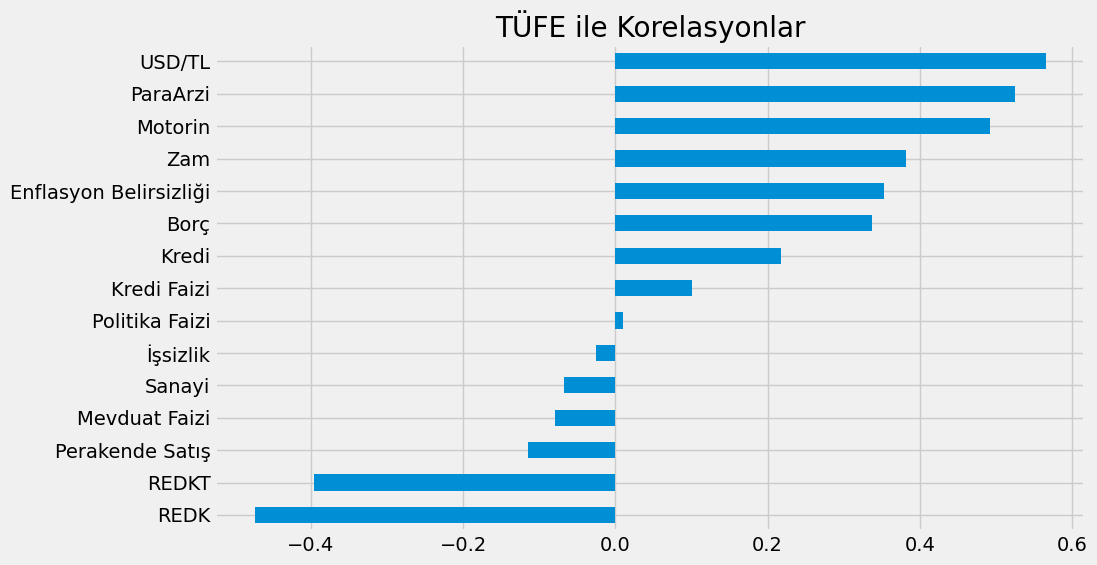

In [32]:
cor_matrix=data1.corr()
cor_matrix=(cor_matrix["TÜFE"]).sort_values(ascending=True)
cor_matrix[:-1].plot(kind="barh",title="TÜFE ile Korelasyonlar",figsize=(10,6))

In [33]:
data=data.drop(["Perakende Satış","Sanayi","Kredi Faizi"],axis=1)

In [34]:
model=auto_arima(pfaiz["Politika Faizi"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Politika Faizi"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Politika Faizi"]
row=pd.DataFrame({"Politika Faizi":pfaiz.iloc[210:,0]},index=pd.date_range(start="2023-08-30",end="2024-02-28",freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)
faiztahmin.iloc[4:,0]=[42.5,45,45,45,45,45,45,45,45,45,42.5,40,37.5,35,35,35,35,35,35,35,32.5,30,27.5,25,25,25,25]
faiztahmin

,Politika Faizi
2023-08-31,23.50
2023-09-30,31.00
2023-10-31,33.00
2023-11-30,41.09
2023-12-31,42.50
2024-01-31,45.00
2024-02-29,45.00
2024-03-31,45.00
2024-04-30,45.00
2024-05-31,45.00


In [35]:
model=auto_arima(kfaiz["Kredi Faizi"],seasonal=True,X=np.array(pfaiz["Politika Faizi"]).reshape(-1,1),information_criterion="aic",m=9)
model_fit = model.fit(kfaiz["Kredi Faizi"])

forecast = model_fit.predict(25,X=np.array(faiztahmin["Politika Faizi"][6:]).reshape(-1,1))
kfaiztahmin=pd.DataFrame(forecast)
kfaiztahmin.columns=["Kredi Faizi"]
new_row=pd.DataFrame({"Kredi Faizi":kfaiz.iloc[210:,0]},index=pd.date_range(start="2023-08-30",end="2024-02-28",freq="1M"))
kfaiztahmin=pd.concat([new_row,kfaiztahmin],axis=0)
kfaiztahmin



,Kredi Faizi
2023-08-31,45.290000
2023-09-30,57.560000
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,60.750000
2024-02-29,60.588651
2024-03-31,61.010825
2024-04-30,61.611557
2024-05-31,62.000770


In [36]:
trainexog=kfaiz[47:-2]
trainexog

,Kredi Faizi
2010-01-31,13.76
2010-02-28,13.36
2010-03-31,13.10
2010-04-30,13.18
2010-05-31,13.25
...,...
2023-07-31,44.58
2023-08-31,45.29
2023-09-30,57.56
2023-10-31,58.43


In [37]:
testexog=kfaiztahmin[2:]
testexog

,Kredi Faizi
2023-10-31,58.430000
2023-11-30,58.610000
2023-12-31,58.160000
2024-01-31,60.750000
2024-02-29,60.588651
2024-03-31,61.010825
2024-04-30,61.611557
2024-05-31,62.000770
2024-06-30,62.019194
2024-07-31,61.762339


In [38]:
faiztahmin[5:]

,Politika Faizi
2024-01-31,45.0
2024-02-29,45.0
2024-03-31,45.0
2024-04-30,45.0
2024-05-31,45.0
2024-06-30,45.0
2024-07-31,45.0
2024-08-31,45.0
2024-09-30,45.0
2024-10-31,42.5


In [39]:
model=auto_arima(mfaiz["Mevduat Faizi"],X=pfaiz,trace=False,seasonal=False,information_criterion="aic")
mfaiztahmin=pd.DataFrame(model.predict(27,X=faiztahmin[4:]))
mfaiztahmin.columns=["Mevduat Faizi"]
row=pd.DataFrame({"Mevduat Faizi":mfaiz.iloc[-2:,0]},index=pd.date_range(start="2023-12-30",periods=2,freq="1M"))
mfaiztahmin=pd.concat([row,mfaiztahmin],axis=0)
mfaiztahmin


,Mevduat Faizi
2023-12-31,52.500000
2024-01-31,49.980000
2024-02-29,47.789843
2024-03-31,51.342682
2024-04-30,50.841303
2024-05-31,50.120276
2024-06-30,50.744143
2024-07-31,50.711366
2024-08-31,50.455817
2024-09-30,50.613303


In [40]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [41]:
exog=pd.DataFrame()
exog["X"]=usd["TP_DK_USD_S_YTL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2023-09-30,2504.165548
2023-10-31,2432.069312
2023-11-30,2316.594077
2023-12-31,2231.258978


In [42]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [43]:
faiztahmin.columns=["Faiz"]


In [44]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Politika Faizi"].iloc[95:-14]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Politika Faizi"].iloc[-14:-2],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [45]:
exog=pfaiz["Politika Faizi"].iloc[95:-2]
exog=np.array(exog).reshape(-1,1)

In [46]:
exogtest=faiztahmin.iloc[3:]
exogtest=np.array(exogtest).reshape(-1,1)

In [47]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(28,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2023-12-31,9.038680
2024-01-31,8.940522
2024-02-29,9.141120
2024-03-31,9.201787
2024-04-30,9.221023
2024-05-31,9.328421
2024-06-30,9.388207
2024-07-31,9.433416
2024-08-31,9.502816
2024-09-30,9.556027


In [48]:
from prophet import Prophet


In [49]:
df6.shape

(216, 1)

In [50]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 50),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,50),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df6[:-12].index
    sn["y"]=df6[:-12].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df6[-12:].values,predictions["yhat"][-12:])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')
"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 50),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,50),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df6[:-12].index\n    sn["y"]=df6[:-12].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params[

In [51]:
"""study.best_params"""

'study.best_params'

In [52]:
sn=pd.DataFrame()
sn["ds"]=df6.index
sn["y"]=df6.values
prophet=Prophet(growth="linear",changepoint_prior_scale=7.495807516055437,changepoint_range=0.9731904611246964,seasonality_prior_scale=7.717380426245633,n_changepoints=90,interval_width=0.70,mcmc_samples=50)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=14,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:40 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

00:01:42 - cmdstanpy - INFO - CmdStan done processing.
00:01:42 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!
00:01:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 23 divergent transitions (92.0%)
	Chain 1 had 2 iterations at max treedepth (8.0%)
	Chain 2 had 25 divergent transitions (100.0%)
	Chain 3 had 25 iterati

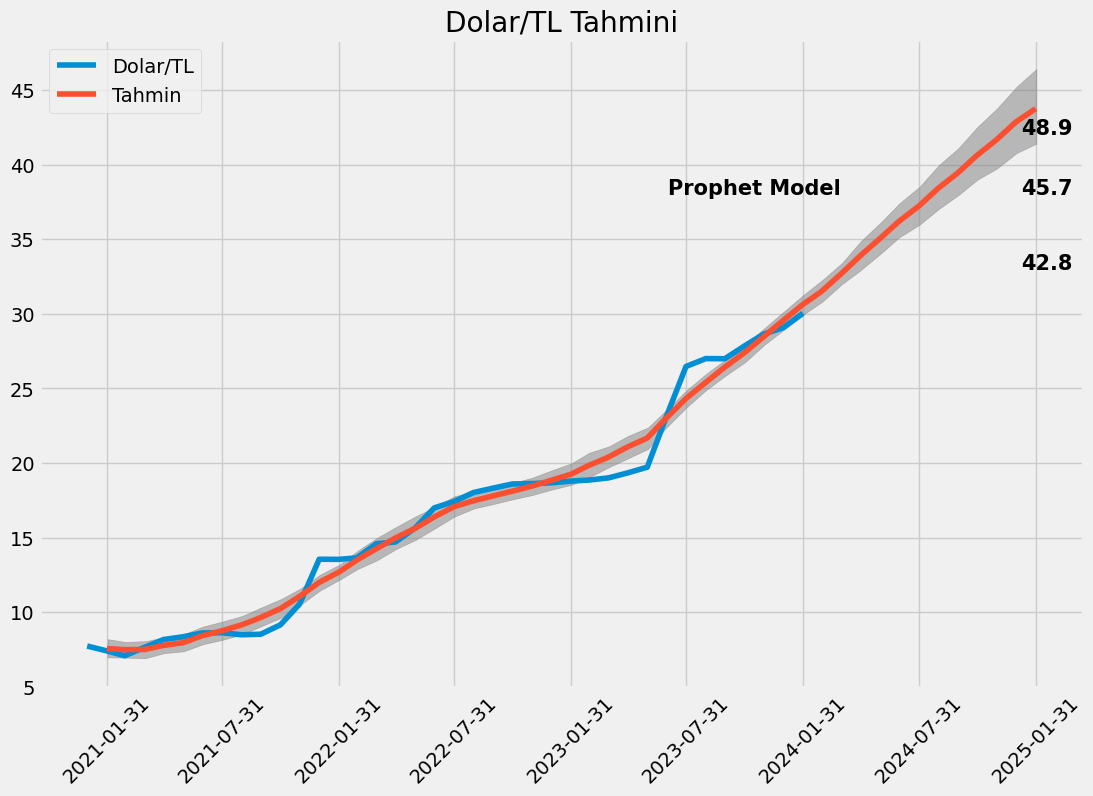

In [53]:
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.plot(df6["USD/TL"][-38:],label='Dolar/TL')
plt.plot(predictions["yhat"][-51:-2],label='Tahmin')
annotation_date = mdates.datestr2num('2025-03-30')
annotation_date1 = mdates.datestr2num('2024-03-30')
plt.text(annotation_date1, 38,  "Prophet Model",fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 38,  str(predictions["yhat"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 33,  str(predictions["yhat_lower"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 42,  str(predictions["yhat_upper"][-1])[:4],fontsize=15, color='black', horizontalalignment='right',fontweight='bold')
plt.fill_between(predictions["yhat"][-51:-1].index.strftime("%Y-%m"), predictions["yhat_upper"][-51:-1].shift(1), predictions["yhat_lower"][-51:-1].shift(1), alpha=0.5, color='gray')
plt.xticks(predictions.index[-51:-2:6],rotation=45)
plt.title('Dolar/TL Tahmini')
plt.legend(loc=2)

In [54]:
usdtahmin=(predictions["yhat"][-15:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-02-29    2.809413
2024-03-31    3.770035
2024-04-30    3.690961
2024-05-31    3.408149
2024-06-30    3.300903
2024-07-31    2.784493
2024-08-31    3.267565
2024-09-30    2.602465
2024-10-31    3.060448
2024-11-30    2.504339
2024-12-31    2.909825
2025-01-31    2.070422
2025-02-28    2.115037
2025-03-31    2.480548
Name: yhat, dtype: float64

In [55]:
usdtahmin1 = []
result = df6.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([df6.iloc[-6:],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2023-08-30", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2023-08-31,26.999127
2023-09-30,26.989448
2023-10-31,27.846114
2023-11-30,28.637082
2023-12-31,29.074857
2024-01-31,30.039346
2024-02-29,30.883275
2024-03-31,32.047585
2024-04-30,33.230449
2024-05-31,34.362992


In [56]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [57]:
"""study.best_params"""

'study.best_params'

In [58]:
sn=pd.DataFrame()
sn["ds"]=df14[50:].index
sn["y"]=df14[50:].values
prophet=Prophet(growth="linear",changepoint_prior_scale=8.441645091305189,changepoint_range=0.9896533088928638,seasonality_prior_scale=6.984796984939141,n_changepoints=96)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:44 - cmdstanpy - INFO - Chain [1] start processing
00:01:44 - cmdstanpy - INFO - Chain [1] done processing


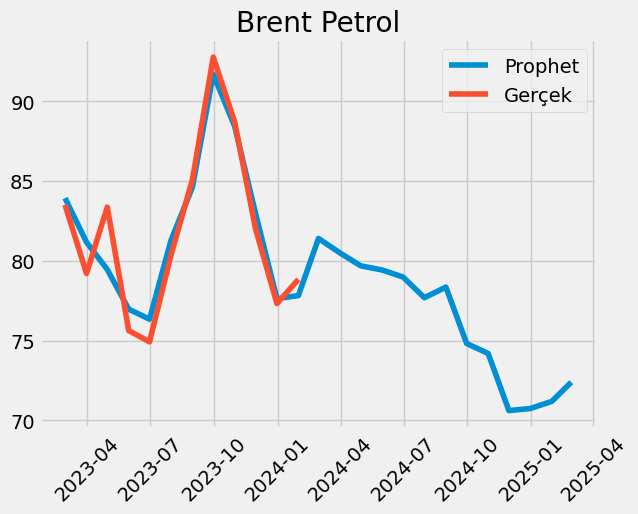

In [59]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-25:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [60]:
brenttahmin=predictions["yhat"][-17:]
brenttahmin

ds
2023-10-31    88.429057
2023-11-30    82.995063
2023-12-31    77.630174
2024-01-31    77.827797
2024-02-29    81.405368
2024-03-31    80.499091
2024-04-30    79.690703
2024-05-31    79.427697
2024-06-30    78.990761
2024-07-31    77.693044
2024-08-31    78.357334
2024-09-30    74.822375
2024-10-31    74.201303
2024-11-30    70.620580
2024-12-31    70.750869
2025-01-31    71.198450
2025-02-28    72.399128
Name: yhat, dtype: float64

In [61]:
"""brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")
brenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])
del brenttahmin["Unnamed: 0"]
brenttahmin.index.name="" 
brenttahmin"""

'brenttahmin=pd.read_csv("C:/Users/Bora/Downloads/brent_forecast.csv")\nbrenttahmin=brenttahmin.set_index(brenttahmin["Unnamed: 0"])\ndel brenttahmin["Unnamed: 0"]\nbrenttahmin.index.name="" \nbrenttahmin'

In [62]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.80),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik[40:].index
    sn["y"]=enf_belirsizlik[40:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.80),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik[40:].index\n    sn["y"]=enf_belirsizlik[40:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\

In [63]:
"""study.best_params"""

'study.best_params'

00:01:45 - cmdstanpy - INFO - Chain [1] start processing
00:01:45 - cmdstanpy - INFO - Chain [1] done processing


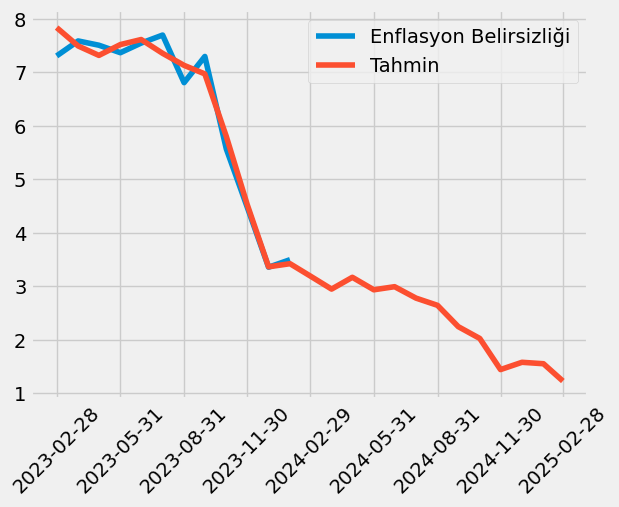

In [64]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=17.95210046456901,changepoint_range=0.9993099781087834,seasonality_prior_scale=6.849099847065717,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()


In [65]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-15:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0]=3.36
enfbelirsizliktahmin1.iloc[1]=3.5
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2023-12-31,3.360000
2024-01-31,3.500000
2024-02-29,3.196880
2024-03-31,2.950193
2024-04-30,3.170942
2024-05-31,2.937366
2024-06-30,2.995336
2024-07-31,2.781375
2024-08-31,2.646703


In [66]:
model=auto_arima(enf_belirsizlik,trace=False,information_criterion='aic',seasonal=True,m=5)
enfbelirsizliktahmin1=model.predict(13)
enfbelirsizliktahmin1=pd.DataFrame(enfbelirsizliktahmin1)
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
row=pd.DataFrame({"Enflasyon Belirsizliği":enf_belirsizlik.iloc[-2:,0]},index=pd.date_range(start="2023-12-30",periods=2,freq="1M"))
enfbelirsizliktahmin1=pd.concat([row,enfbelirsizliktahmin1],axis=0)
enfbelirsizliktahmin1


,Enflasyon Belirsizliği
2023-12-31,3.360000
2024-01-31,3.500000
2024-02-29,3.967532
2024-03-31,4.053110
2024-04-30,3.845228
2024-05-31,3.035603
2024-06-30,2.866354
2024-07-31,3.113368
2024-08-31,3.634033
2024-09-30,3.735483


In [67]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [68]:
#study.best_params

In [69]:
sn=pd.DataFrame()
sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].index
sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][80:].values
sn["cap"]=190
prophet=Prophet(changepoint_prior_scale=3.481321992729419,changepoint_range=0.8995930316928846,growth='linear',seasonality_prior_scale=8.977376335194005,yearly_seasonality=True,weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
future_dates["cap"]=190
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:01:59 - cmdstanpy - INFO - Chain [1] start processing
00:01:59 - cmdstanpy - INFO - Chain [1] done processing


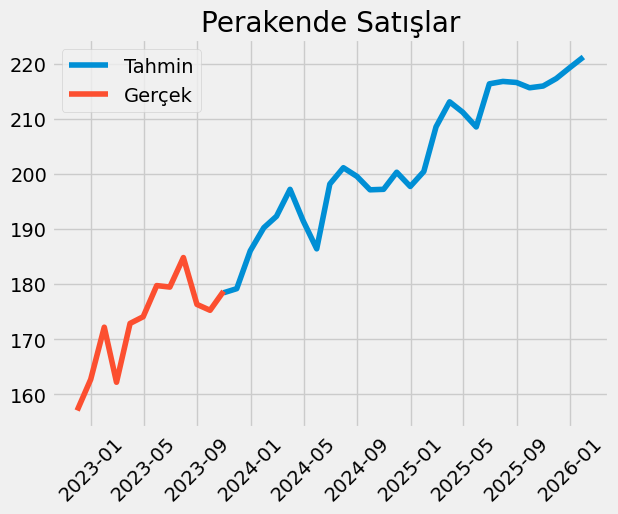

In [70]:
plt.title("Perakende Satışlar")
plt.plot(predictions["yhat"][-28:],label="Tahmin")
plt.plot(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [71]:
perakendetahmin=(predictions["yhat"][-28:].pct_change(periods=1)*100).dropna()
perakendetahmin

ds
2023-11-30    0.417766
2023-12-31    3.837414
2024-01-31    2.255112
2024-02-29    1.093496
2024-03-31    2.545369
2024-04-30   -2.901185
2024-05-31   -2.657283
2024-06-30    6.315988
2024-07-31    1.493700
2024-08-31   -0.782232
2024-09-30   -1.221874
2024-10-31    0.044657
2024-11-30    1.575699
2024-12-31   -1.293369
2025-01-31    1.373530
2025-02-28    4.050079
2025-03-31    2.179169
2025-04-30   -0.886073
2025-05-31   -1.268685
2025-06-30    3.756526
2025-07-31    0.201727
2025-08-31   -0.087168
2025-09-30   -0.445215
2025-10-31    0.148098
2025-11-30    0.628616
2025-12-31    0.911598
2026-01-31    0.878391
Name: yhat, dtype: float64

In [72]:
((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())

,USD/TL
2023-11-30,2.840498
2023-12-31,1.528701
2024-01-31,3.317260
2024-02-29,2.809413
2024-03-31,3.770035
2024-04-30,3.690961
2024-05-31,3.408149
2024-06-30,3.300903
2024-07-31,2.784493
2024-08-31,3.267565


In [73]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2023-11-30   -6.145032
2023-12-31   -6.464107
2024-01-31    0.254570
2024-02-29    4.596778
2024-03-31   -1.113290
2024-04-30   -1.004219
2024-05-31   -0.330033
2024-06-30   -0.550106
2024-07-31   -1.642871
2024-08-31    0.855018
2024-09-30   -4.511331
2024-10-31   -0.830062
2024-11-30   -4.825687
2024-12-31    0.184491
2025-01-31    0.632616
2025-02-28    1.686382
Name: yhat, dtype: float64

In [74]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[2:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2023-11-30",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2023-11-30,7.001647
2023-12-31,-5.034223
2024-01-31,3.580275
2024-02-29,7.535333
2024-03-31,2.614774
2024-04-30,2.649677
2024-05-31,3.066868
2024-06-30,2.732638
2024-07-31,1.095876
2024-08-31,4.150521


In [75]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [76]:
"""study.best_params"""

'study.best_params'

In [77]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=4.9385825316091445,changepoint_range=0.9538315586393957,growth='linear',seasonality_prior_scale=4.314940386271349,n_changepoints=76,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:00 - cmdstanpy - INFO - Chain [1] start processing
00:02:00 - cmdstanpy - INFO - Chain [1] done processing


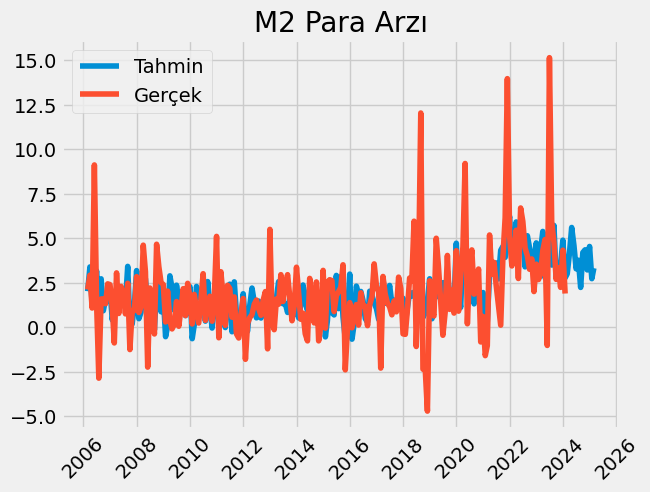

In [78]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [79]:
paraarzitahmin=(predictions["yhat"]).tail(14)
paraarzitahmin

ds
2024-01-31    2.776292
2024-02-29    3.008923
2024-03-31    4.184940
2024-04-30    5.609333
2024-05-31    4.596524
2024-06-30    3.286571
2024-07-31    3.771197
2024-08-31    2.241953
2024-09-30    4.198683
2024-10-31    4.356107
2024-11-30    3.223316
2024-12-31    4.541556
2025-01-31    2.732186
2025-02-28    3.322552
Name: yhat, dtype: float64

In [80]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-01-31", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:-1,0]},index=pd.date_range(start="2023-10-31",periods=3,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2023-10-31,3.356297
2023-11-30,2.245991
2023-12-31,4.333376
2024-01-31,2.776292
2024-02-29,3.008923
2024-03-31,4.184940
2024-04-30,5.609333
2024-05-31,4.596524
2024-06-30,3.286571
2024-07-31,3.771197


In [81]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [82]:
#study.best_params

In [128]:
sn=pd.DataFrame()
sn["ds"]=borc["Borç"][103:].index
sn["y"]=borc["Borç"][103:].values
sn["cap"]=100
prophet=Prophet(changepoint_prior_scale=3.671534257218686,changepoint_range=0.8995013103592469,growth='linear',seasonality_prior_scale=4.464356522636207,n_changepoints=2)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
future_dates["cap"]=100
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:04:58 - cmdstanpy - INFO - Chain [1] start processing
00:04:58 - cmdstanpy - INFO - Chain [1] done processing


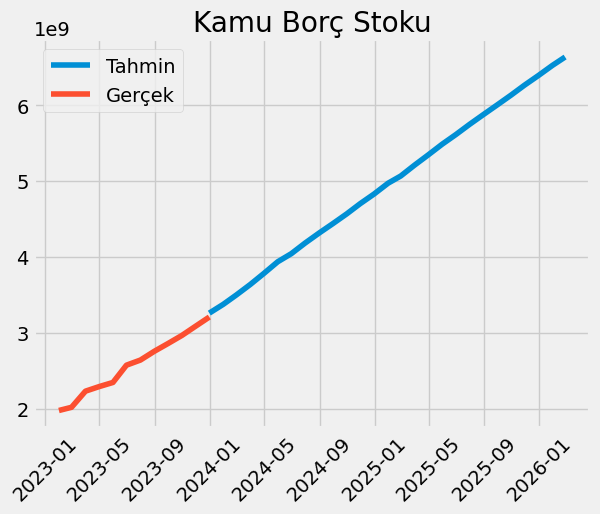

In [124]:
plt.title("Kamu Borç Stoku")
plt.plot(predictions["yhat"][-27:],label="Tahmin")
plt.plot(borc["Borç"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [129]:
borctahmin=(predictions["yhat"].pct_change(periods=1)*100).tail(26)
borctahmin

ds
2024-01-31    3.549683
2024-02-29    3.641687
2024-03-31    3.952185
2024-04-30    3.974986
2024-05-31    4.087029
2024-06-30    2.691098
2024-07-31    3.494913
2024-08-31    3.137333
2024-09-30    2.820024
2024-10-31    2.915254
2024-11-30    2.952763
2024-12-31    2.718657
2025-01-31    2.932624
2025-02-28    1.902385
2025-03-31    2.850371
2025-04-30    2.554249
2025-05-31    2.642735
2025-06-30    2.279607
2025-07-31    2.435279
2025-08-31    2.266843
2025-09-30    2.116154
2025-10-31    2.167006
2025-11-30    2.144938
2025-12-31    2.035404
2026-01-31    2.078257
2026-02-28    1.680028
Name: yhat, dtype: float64

In [130]:
borctahmin1 = []
result = borc.iloc[-1,0]
for i in range(len(borctahmin)):
    result *= (1 + borctahmin[i] / 100)
    borctahmin1.append(result)

borctahmin1 = np.array(borctahmin1).reshape(-1, 1)
borctahmin1 = pd.DataFrame(borctahmin1)
borctahmin1.columns = ["Borç"]
borctahmin1 = borctahmin1.set_index(pd.date_range(start="2024-01-30", periods=len(borctahmin1), freq="1M"))
row=pd.DataFrame({"Borç":borc.iloc[-4:,0]},index=pd.date_range(start="2023-09-30",periods=4,freq="1M"))
borctahmin1=pd.concat([row,borctahmin1],axis=0)
borctahmin1

,Borç
2023-09-30,2.859751e+09
2023-10-31,2.966763e+09
2023-11-30,3.086466e+09
2023-12-31,3.209252e+09
2024-01-31,3.323170e+09
2024-02-29,3.444190e+09
2024-03-31,3.580310e+09
2024-04-30,3.722627e+09
2024-05-31,3.874772e+09
2024-06-30,3.979046e+09


In [87]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 15),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,15),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 15),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,15),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growt

In [88]:
"""study.best_params"""

'study.best_params'

In [89]:
sn=pd.DataFrame()
sn["ds"]=df3["Kredi"].index
sn["y"]=df3["Kredi"].values
prophet=Prophet(changepoint_prior_scale=14.571144908454663,changepoint_range=0.8904873855141803,growth="linear",seasonality_prior_scale=1.5574317873100854,n_changepoints=192,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:02 - cmdstanpy - INFO - Chain [1] start processing
00:02:03 - cmdstanpy - INFO - Chain [1] done processing


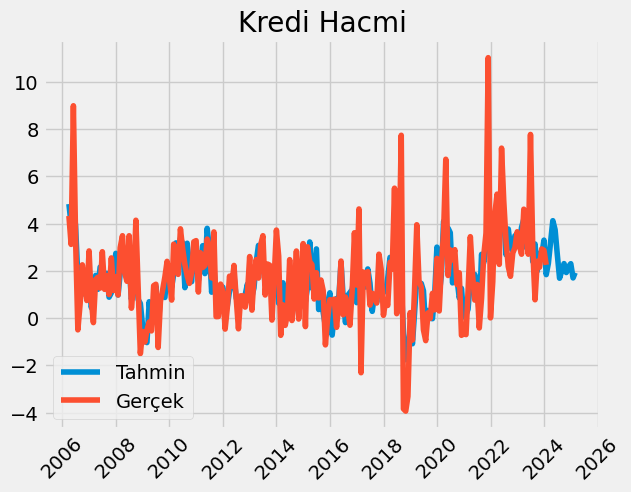

In [90]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(df3["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [91]:
kreditahmin=(predictions["yhat"]).tail(13)
kreditahmin

ds
2024-02-29    2.324526
2024-03-31    3.234663
2024-04-30    4.128187
2024-05-31    3.746514
2024-06-30    2.695614
2024-07-31    1.691445
2024-08-31    2.016700
2024-09-30    2.311237
2024-10-31    1.933540
2024-11-30    2.177725
2024-12-31    2.307904
2025-01-31    1.704290
2025-02-28    1.927383
Name: yhat, dtype: float64

In [92]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":df3.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2023-10-31,2.154973
2023-11-30,2.932091
2023-12-31,2.873464
2024-01-31,2.258033
2024-02-29,2.324526
2024-03-31,3.234663
2024-04-30,4.128187
2024-05-31,3.746514
2024-06-30,2.695614
2024-07-31,1.691445


In [93]:
'''def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,200),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index
    sn["y"]=m3["M3 Para Arzi"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3 Para Arzi"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,200),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3 Para Arzi"][params["m"]:-12].index\n    sn["y"]=m3["M3 Para Arzi"][

In [94]:
#study.best_params

In [95]:
sn=pd.DataFrame()
sn["ds"]=m3["M3 Para Arzi"][151:].index
sn["y"]=m3["M3 Para Arzi"][151:].values
sn["cap"]=386.728728252815
prophet=Prophet(changepoint_prior_scale=1.0239522189165728,changepoint_range=0.8631788185438879,growth='logistic',seasonality_prior_scale=8.271825948806738,n_changepoints=14,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["cap"]=386.728728252815
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:04 - cmdstanpy - INFO - Chain [1] start processing
00:02:05 - cmdstanpy - INFO - Chain [1] done processing


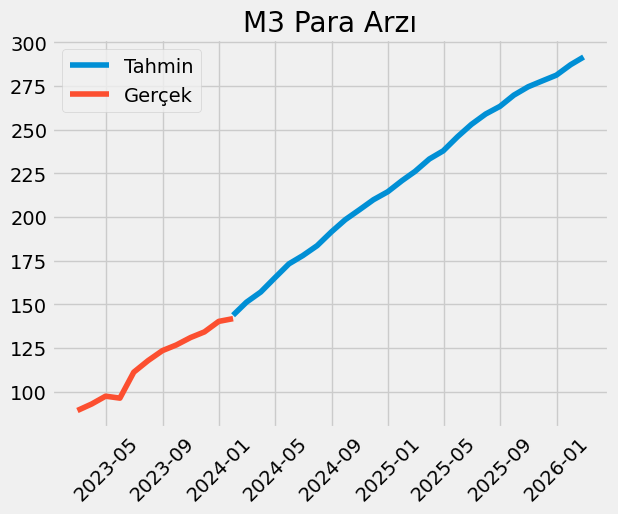

In [96]:
plt.title("M3 Para Arzı")
plt.plot(predictions["yhat"][-26:],label="Tahmin")
plt.plot(m3["M3 Para Arzi"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
m3tahmin=(predictions["yhat"].tail(26).pct_change(periods=1)*100).dropna()
m3tahmin1 = []
result = m3.iloc[-1,0]
for i in range(len(m3tahmin)):
    result *= (1 + m3tahmin[i] / 100)
    m3tahmin1.append(result)

m3tahmin1 = np.array(m3tahmin1).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-02-28", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2023-10-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2023-10-31,130.934676
2023-11-30,134.161244
2023-12-31,140.183543
2024-01-31,141.746182
2024-02-29,149.111197
2024-03-31,154.871781
2024-04-30,162.762541
2024-05-31,170.768041
2024-06-30,175.435544
2024-07-31,181.043063


In [98]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [99]:
#study.best_params

In [100]:
sn=pd.DataFrame()
sn["ds"]=sanayi["Sanayi"].index
sn["y"]=sanayi["Sanayi"].values
prophet=Prophet(changepoint_prior_scale=9.619978429571834,changepoint_range=0.8872026398316396,growth='linear',seasonality_prior_scale=4.66384076344283,n_changepoints=25,yearly_seasonality="auto",weekly_seasonality=True)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:06 - cmdstanpy - INFO - Chain [1] start processing
00:02:07 - cmdstanpy - INFO - Chain [1] done processing


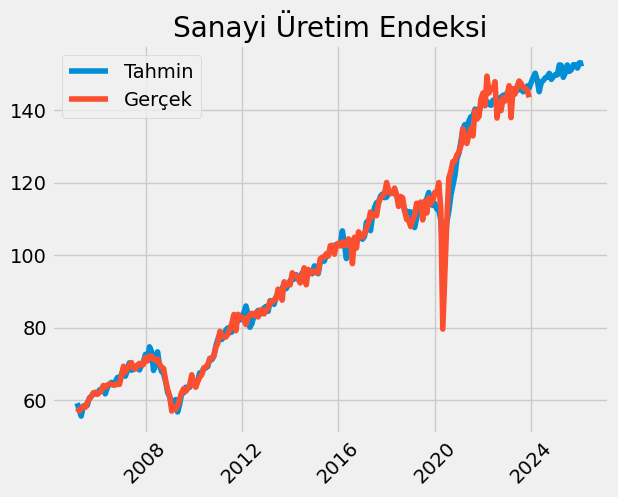

In [101]:
plt.title("Sanayi Üretim Endeksi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(sanayi["Sanayi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [102]:
sanayitahmin=(predictions["yhat"].tail(27).pct_change(periods=1)*100).dropna()
sanayitahmin1 = []
result = sanayi.iloc[-1,0]
for i in range(len(sanayitahmin)):
    result *= (1 + sanayitahmin[i] / 100)
    sanayitahmin1.append(result)

sanayitahmin1 = np.array(sanayitahmin1).reshape(-1, 1)
sanayitahmin1 = pd.DataFrame(sanayitahmin1)
sanayitahmin1.columns = ["Sanayi"]
sanayitahmin1 = sanayitahmin1.set_index(pd.date_range(start="2023-12-30", periods=len(sanayitahmin1), freq="1M"))
#row=pd.DataFrame({"Sanayi":df3.iloc[-2:,0]},index=pd.date_range(start="2023-10-30",periods=2,freq="1M"))
#sanayitahmin1=pd.concat([row,sanayitahmin1],axis=0)
sanayitahmin1

,Sanayi
2023-12-31,144.902218
2024-01-31,146.030496
2024-02-29,144.210225
2024-03-31,141.080420
2024-04-30,143.596436
2024-05-31,144.089681
2024-06-30,144.800885
2024-07-31,145.018318
2024-08-31,145.997254
2024-09-30,144.369606


In [103]:
'''def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"][params["m"]:-36].index
    sn["y"]=redkt["REDKT"][params["m"]:-36].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"][-36:],predictions["yhat"][-36:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"][params["m"]:-36].index\n    sn["y"]=redkt["REDKT"][params[

In [104]:
#study.best_params

In [105]:
sn=pd.DataFrame()
sn["ds"]=redkt["REDKT"].index
sn["y"]=redkt["REDKT"].values
sn["cap"]=300
prophet=Prophet(changepoint_prior_scale=4.998474885835357,
 changepoint_range=0.8719913329652468,
 growth='logistic')
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
future_dates["cap"]=300
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:08 - cmdstanpy - INFO - Chain [1] start processing
00:02:08 - cmdstanpy - INFO - Chain [1] done processing


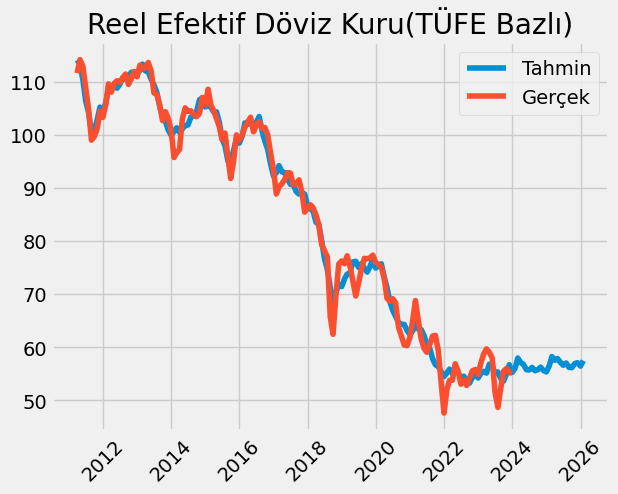

In [106]:
plt.title("Reel Efektif Döviz Kuru(TÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redkt["REDKT"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [107]:
predictions["yhat"].tail(26)

ds
2023-12-31    55.290489
2024-01-31    56.048351
2024-02-29    57.995997
2024-03-31    57.149339
2024-04-30    56.797315
2024-05-31    55.794941
2024-06-30    55.748511
2024-07-31    56.221339
2024-08-31    55.600618
2024-09-30    55.793380
2024-10-31    56.275837
2024-11-30    55.636140
2024-12-31    55.379393
2025-01-31    56.522839
2025-02-28    58.264423
2025-03-31    57.572811
2025-04-30    57.895496
2025-05-31    57.155196
2025-06-30    56.628397
2025-07-31    57.053893
2025-08-31    56.225123
2025-09-30    56.182890
2025-10-31    56.944295
2025-11-30    57.106585
2025-12-31    56.471531
2026-01-31    57.493535
Name: yhat, dtype: float64

In [108]:
redkttahmin=predictions["yhat"].tail(26)
redkttahmin=pd.DataFrame(redkttahmin)
redkttahmin.columns=["REDKT"]
redkttahmin=redkttahmin.set_index(pd.date_range(start="2023-12-31",periods=len(redkttahmin),freq="1M"))
redkttahmin.iloc[0,0]=redkt.iloc[-1,0]
redkttahmin

,REDKT
2023-12-31,55.150000
2024-01-31,56.048351
2024-02-29,57.995997
2024-03-31,57.149339
2024-04-30,56.797315
2024-05-31,55.794941
2024-06-30,55.748511
2024-07-31,56.221339
2024-08-31,55.600618
2024-09-30,55.793380


In [109]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redk["REDK"].index
    sn["y"]=redk["REDK"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"].head(len(predictions)-13))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redk["REDK"].index\n    sn["y"]=redk["REDK"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scale=par

In [110]:
sn=pd.DataFrame()
sn["ds"]=redk["REDK"].index
sn["y"]=redk["REDK"].values
prophet=Prophet(changepoint_prior_scale=6.258111900769947,changepoint_range=0.9753144235744484,growth='linear',seasonality_prior_scale=0.16965698744688584,n_changepoints=99,yearly_seasonality=True,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=27,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

00:02:09 - cmdstanpy - INFO - Chain [1] start processing
00:02:10 - cmdstanpy - INFO - Chain [1] done processing


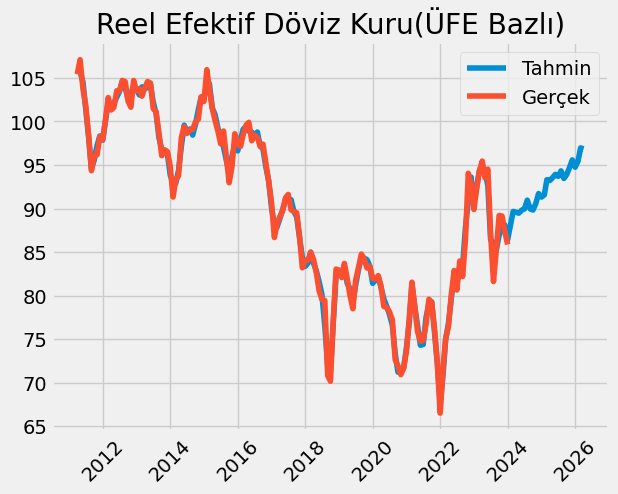

In [111]:
plt.title("Reel Efektif Döviz Kuru(ÜFE Bazlı)")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(redk["REDK"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [112]:
predictions["yhat"].tail(28)

ds
2023-12-31    86.420048
2024-01-31    88.072586
2024-02-29    89.666317
2024-03-31    89.578612
2024-04-30    89.464107
2024-05-31    89.812927
2024-06-30    89.954405
2024-07-31    90.963354
2024-08-31    89.954361
2024-09-30    89.827538
2024-10-31    90.577275
2024-11-30    91.721013
2024-12-31    91.314583
2025-01-31    91.567826
2025-02-28    93.316883
2025-03-31    93.210845
2025-04-30    93.539963
2025-05-31    93.929347
2025-06-30    93.696462
2025-07-31    94.325690
2025-08-31    93.451472
2025-09-30    93.904058
2025-10-31    94.708150
2025-11-30    95.587821
2025-12-31    94.744348
2026-01-31    95.459586
2026-02-28    96.967264
2026-03-31    96.850795
Name: yhat, dtype: float64

In [113]:
redktahmin=predictions["yhat"].tail(28)
redktahmin=pd.DataFrame(redktahmin)
redktahmin.columns=["REDK"]
redktahmin=redktahmin.set_index(pd.date_range(start="2023-12-31",periods=len(redktahmin),freq="1M"))
redktahmin.iloc[0,0]=redk.iloc[-1,0]
redktahmin

,REDK
2023-12-31,85.870000
2024-01-31,88.072586
2024-02-29,89.666317
2024-03-31,89.578612
2024-04-30,89.464107
2024-05-31,89.812927
2024-06-30,89.954405
2024-07-31,90.963354
2024-08-31,89.954361
2024-09-30,89.827538


In [114]:
motorintahmin.iloc[2]=8.4
motorintahmin.iloc[1]=-3.34

In [115]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 2),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.001,1.0),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoinst',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=historical_volatility.index
    sn["y"]=historical_volatility.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 2),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.001,1.0),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoinst\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=historical_volatility.index\n    sn["y"]=historical_volatility.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predict

In [116]:
"""study.best_params"""

'study.best_params'

In [131]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean(),sanayitahmin1["Sanayi"],m3tahmin1["M3"].shift(1),borctahmin1.shift(1)],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
#tahmindf=tahmindf.dropna(axis=0)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["Kredi Faizi"]=kfaiztahmin["Kredi Faizi"]
tahmindf["Mevduat Faizi"]=mfaiztahmin["Mevduat Faizi"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["REDKT"]=redkttahmin["REDKT"]
tahmindf["REDK"]=redktahmin["REDK"]
#tahmindf["Politika Faizi"]=faiztahmin["Faiz"]
tahmindf["Perakende Satış"]=perakendetahmin




tahmindf["Politika Faizi"]=[42.5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45]
tahmindf=tahmindf[['USD/TL', 'Motorin', 'Kredi Faizi', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]]

tahmindf.columns=["USD/TL","Motorin","Kredi Faizi","Zam","Enflasyon Belirsizliği",'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi','REDKT','REDK','İşsizlik','Politika Faizi',"Sanayi","Perakende Satış"]
tahmindf=tahmindf.dropna(axis=0)









#tahmindf.iloc[0,1]=5.76
tahmindf

,USD/TL,Motorin,Kredi Faizi,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi,Sanayi,Perakende Satış
2024-01-31,2.563443,8.400000,60.750000,49.11,3.500000,4.333376,3.978186,2.687863,49.980000,56.048351,88.072586,8.940522,45.0,0.778648,2.255112
2024-02-29,2.559727,7.535333,60.588651,0.00,3.967532,2.776292,3.549683,2.485341,47.789843,57.995997,89.666317,9.141120,45.0,-1.246501,1.093496
2024-03-31,3.303124,2.614774,61.010825,0.00,4.053110,3.008923,3.641687,2.605741,51.342682,57.149339,89.578612,9.201787,45.0,-2.170307,2.545369
2024-04-30,3.432394,2.649677,61.611557,0.00,3.845228,4.184940,3.952185,3.229125,50.841303,56.797315,89.464107,9.221023,45.0,1.783391,-2.901185
2024-05-31,3.618625,3.066868,62.000770,0.00,3.035603,5.609333,3.974986,3.703122,50.120276,55.794941,89.812927,9.328421,45.0,0.343495,-2.657283
2024-06-30,3.462124,2.732638,62.019194,0.00,2.866354,4.596524,4.087029,3.523438,50.744143,55.748511,89.954405,9.388207,45.0,0.493584,6.315988
2024-07-31,3.157657,1.095876,61.762339,0.00,3.113368,3.286571,2.691098,2.711191,50.711366,56.221339,90.963354,9.433416,45.0,0.150160,1.493700
2024-08-31,3.117092,4.150521,61.453813,0.00,3.634033,3.771197,3.494913,2.134586,50.455817,55.600618,89.954361,9.502816,45.0,0.675043,-0.782232
2024-09-30,2.882675,-2.026272,61.282519,0.00,3.735483,2.241953,3.137333,2.006461,50.613303,55.793380,89.827538,9.556027,45.0,-1.114849,-1.221874
2024-10-31,2.974480,2.204982,61.305943,0.00,3.368673,4.198683,2.820024,2.087159,50.637315,56.275837,90.577275,9.603006,45.0,0.530569,0.044657


In [132]:
tahmindf=tahmindf.drop(["Kredi Faizi","Sanayi","Perakende Satış"],axis=1)
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDKT,REDK,İşsizlik,Politika Faizi
2024-01-31,2.563443,8.400000,49.11,3.500000,4.333376,3.978186,2.687863,49.980000,56.048351,88.072586,8.940522,45.0
2024-02-29,2.559727,7.535333,0.00,3.967532,2.776292,3.549683,2.485341,47.789843,57.995997,89.666317,9.141120,45.0
2024-03-31,3.303124,2.614774,0.00,4.053110,3.008923,3.641687,2.605741,51.342682,57.149339,89.578612,9.201787,45.0
2024-04-30,3.432394,2.649677,0.00,3.845228,4.184940,3.952185,3.229125,50.841303,56.797315,89.464107,9.221023,45.0
2024-05-31,3.618625,3.066868,0.00,3.035603,5.609333,3.974986,3.703122,50.120276,55.794941,89.812927,9.328421,45.0
2024-06-30,3.462124,2.732638,0.00,2.866354,4.596524,4.087029,3.523438,50.744143,55.748511,89.954405,9.388207,45.0
2024-07-31,3.157657,1.095876,0.00,3.113368,3.286571,2.691098,2.711191,50.711366,56.221339,90.963354,9.433416,45.0
2024-08-31,3.117092,4.150521,0.00,3.634033,3.771197,3.494913,2.134586,50.455817,55.600618,89.954361,9.502816,45.0
2024-09-30,2.882675,-2.026272,0.00,3.735483,2.241953,3.137333,2.006461,50.613303,55.793380,89.827538,9.556027,45.0
2024-10-31,2.974480,2.204982,0.00,3.368673,4.198683,2.820024,2.087159,50.637315,56.275837,90.577275,9.603006,45.0


In [143]:
data1=pd.concat([data,tahmindf],axis=0)
data1=data1[:-1]
data1

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
2014-01-31,3.732429,2.881984,14.2,0.820000,3.375162,-0.584687,2.669930,8.631667,91.320000,95.750000,9.200000,9.96,1.978080
2014-02-28,3.033477,1.685899,0.0,0.730000,1.804994,0.808574,1.876850,9.021667,93.310000,96.630000,9.500000,10.23,0.428192
2014-03-31,2.465778,-2.278097,0.0,0.800000,0.451349,0.193691,0.822203,9.485000,93.750000,97.250000,9.500000,10.27,1.125608
2014-04-30,-1.344724,-6.214384,0.0,0.730000,0.796760,0.478162,-0.154556,9.866667,98.140000,102.980000,9.700000,10.03,1.344970
2014-05-31,-1.859714,-0.561578,0.0,0.800000,-0.362357,0.091080,0.146305,10.223333,99.400000,105.100000,9.700000,9.53,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,2.882675,-2.026272,0.0,3.735483,2.241953,3.137333,2.006461,50.613303,89.827538,55.793380,9.556027,45.00,NaN
2024-10-31,2.974480,2.204982,0.0,3.368673,4.198683,2.820024,2.087159,50.637315,90.577275,56.275837,9.603006,45.00,NaN
2024-11-30,2.721209,-2.442200,0.0,3.071839,4.356107,2.915254,2.140834,50.554727,91.721013,55.636140,9.667269,45.00,NaN
2024-12-31,2.823245,3.099684,0.0,3.198880,3.223316,2.952763,2.139723,49.319332,91.314583,55.379393,9.725015,45.00,NaN


In [144]:
data1.loc["2023-05-31","TÜFE"]+=2.88
data1.loc["2023-10-31","TÜFE"]-=0.22
data1.loc["2023-11-30","TÜFE"]-=1.01
data1.loc["2023-12-31","TÜFE"]-=0.33

In [145]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,Borç,Kredi,Mevduat Faizi,REDK,REDKT,İşsizlik,Politika Faizi,TÜFE
0,0.423772,0.112111,1.133123,-0.643377,0.335525,-1.148339,0.582603,-0.864091,0.457533,1.043646,-0.995194,-0.610233,0.082044
1,0.208874,-0.054420,-0.300484,-0.676936,-0.240832,-0.501925,0.048152,-0.831642,0.684487,1.090565,-0.823065,-0.586114,-0.613310
2,0.034331,-0.606327,-0.300484,-0.650835,-0.737710,-0.787204,-0.662567,-0.793091,0.734668,1.123622,-0.823065,-0.582540,-0.300416
3,-1.137235,-1.154377,-0.300484,-0.676936,-0.610921,-0.655222,-1.320798,-0.761335,1.235337,1.429128,-0.708311,-0.603980,-0.202000
4,-1.295573,-0.367337,-0.300484,-0.650835,-1.036395,-0.834811,-1.118050,-0.731660,1.379037,1.542161,-0.708311,-0.648645,-0.628101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.162509,-0.571266,-0.300484,0.443729,-0.080439,0.578522,0.135496,2.628917,0.287321,-1.086724,-0.790919,2.519933,NaN
129,0.190735,0.017852,-0.300484,0.306955,0.637812,0.431304,0.189878,2.630914,0.372827,-1.061001,-0.763963,2.519933,NaN
130,0.112865,-0.629176,-0.300484,0.196274,0.695597,0.475486,0.226049,2.624043,0.503267,-1.095108,-0.727091,2.519933,NaN
131,0.144237,0.142421,-0.300484,0.243644,0.279787,0.492889,0.225300,2.521254,0.456915,-1.108797,-0.693958,2.519933,NaN


In [146]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1][:-13]
y=scaled_data["TÜFE"][:-13]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
#X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=0)


In [190]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import keras
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-4)
    units1 = trial.suggest_int('units1', 1, 100)
    batch_size = trial.suggest_int('batch_size', 2, 40)
    activation1 = trial.suggest_categorical('activation1', ['tanh'])
    optimizer = trial.suggest_categorical('optimizer', ['rmsprop'])
    keras.utils.set_random_seed(42)
    model = Sequential()    
    model.add(LSTM(units=units1,activation=activation1,input_shape=(X_train.shape[1],1)))
    model.add(Dense(1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val,y_val),verbose=0)

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [194]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=500)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

[I 2024-01-28 23:32:27,690] A new study created in memory with name: no-name-9efe2a50-9dc4-4b89-af82-41d7db554589





1/1 [==============================] - 1s 892ms/step


[I 2024-01-28 23:32:40,985] Trial 0 finished with value: 1.3437529054244381 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 1.3437529054244381.


1/1 [==============================] - 1s 577ms/step


[I 2024-01-28 23:32:55,531] Trial 1 finished with value: 2.7637140530199655 and parameters: {'learning_rate': 0.0001, 'units1': 26, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 0 with value: 1.3437529054244381.


1/1 [==============================] - 1s 1s/step


[I 2024-01-28 23:33:07,165] Trial 2 finished with value: 1.3266051808247707 and parameters: {'learning_rate': 0.0001, 'units1': 84, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 2 with value: 1.3266051808247707.


1/1 [==============================] - 1s 868ms/step


[I 2024-01-28 23:33:19,354] Trial 3 finished with value: 1.261765270743439 and parameters: {'learning_rate': 0.0001, 'units1': 73, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 3 with value: 1.261765270743439.


1/1 [==============================] - 1s 858ms/step


[I 2024-01-28 23:33:31,335] Trial 4 finished with value: 1.2450059634279895 and parameters: {'learning_rate': 0.0001, 'units1': 75, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 606ms/step


[I 2024-01-28 23:33:42,323] Trial 5 finished with value: 14.515808358453938 and parameters: {'learning_rate': 0.0001, 'units1': 1, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 582ms/step


[I 2024-01-28 23:34:04,464] Trial 6 finished with value: 1.8345071119249645 and parameters: {'learning_rate': 0.0001, 'units1': 72, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 592ms/step


[I 2024-01-28 23:34:16,810] Trial 7 finished with value: 5.449042922736845 and parameters: {'learning_rate': 0.0001, 'units1': 17, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 644ms/step


[I 2024-01-28 23:34:28,767] Trial 8 finished with value: 1.2587004735394365 and parameters: {'learning_rate': 0.0001, 'units1': 67, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 1s/step


[I 2024-01-28 23:34:45,675] Trial 9 finished with value: 1.5936100079515778 and parameters: {'learning_rate': 0.0001, 'units1': 39, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 769ms/step


[I 2024-01-28 23:34:58,309] Trial 10 finished with value: 1.5179386708264972 and parameters: {'learning_rate': 0.0001, 'units1': 98, 'batch_size': 40, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 597ms/step


[I 2024-01-28 23:35:11,312] Trial 11 finished with value: 1.3734130806383396 and parameters: {'learning_rate': 0.0001, 'units1': 53, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 592ms/step


[I 2024-01-28 23:35:23,211] Trial 12 finished with value: 1.3254856615475497 and parameters: {'learning_rate': 0.0001, 'units1': 57, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 672ms/step


[I 2024-01-28 23:35:37,034] Trial 13 finished with value: 1.7291090027732647 and parameters: {'learning_rate': 0.0001, 'units1': 94, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 679ms/step


[I 2024-01-28 23:35:48,570] Trial 14 finished with value: 1.4077152601144727 and parameters: {'learning_rate': 0.0001, 'units1': 59, 'batch_size': 36, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 695ms/step


[I 2024-01-28 23:36:01,612] Trial 15 finished with value: 1.9916342630998696 and parameters: {'learning_rate': 0.0001, 'units1': 40, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 629ms/step


[I 2024-01-28 23:36:14,929] Trial 16 finished with value: 1.3712622423576801 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 700ms/step


[I 2024-01-28 23:36:28,611] Trial 17 finished with value: 1.5773213357354166 and parameters: {'learning_rate': 0.0001, 'units1': 85, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 796ms/step


[I 2024-01-28 23:36:40,559] Trial 18 finished with value: 2.094453204696329 and parameters: {'learning_rate': 0.0001, 'units1': 45, 'batch_size': 37, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 676ms/step


[I 2024-01-28 23:36:54,269] Trial 19 finished with value: 1.3266051808247707 and parameters: {'learning_rate': 0.0001, 'units1': 84, 'batch_size': 31, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 4 with value: 1.2450059634279895.


1/1 [==============================] - 1s 564ms/step


[I 2024-01-28 23:37:07,032] Trial 20 finished with value: 1.2335967343801635 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 604ms/step


[I 2024-01-28 23:37:20,468] Trial 21 finished with value: 1.3068915294169552 and parameters: {'learning_rate': 0.0001, 'units1': 69, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 598ms/step


[I 2024-01-28 23:37:33,745] Trial 22 finished with value: 1.3714087509637858 and parameters: {'learning_rate': 0.0001, 'units1': 62, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 610ms/step


[I 2024-01-28 23:37:47,214] Trial 23 finished with value: 1.628103810613479 and parameters: {'learning_rate': 0.0001, 'units1': 79, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 615ms/step


[I 2024-01-28 23:37:59,603] Trial 24 finished with value: 1.3336970156787995 and parameters: {'learning_rate': 0.0001, 'units1': 90, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 583ms/step


[I 2024-01-28 23:38:10,253] Trial 25 finished with value: 1.3322704865881316 and parameters: {'learning_rate': 0.0001, 'units1': 46, 'batch_size': 28, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 589ms/step


[I 2024-01-28 23:38:23,468] Trial 26 finished with value: 1.4577807671946443 and parameters: {'learning_rate': 0.0001, 'units1': 65, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 584ms/step


[I 2024-01-28 23:38:35,606] Trial 27 finished with value: 1.2644243159069417 and parameters: {'learning_rate': 0.0001, 'units1': 52, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 589ms/step


[I 2024-01-28 23:38:45,629] Trial 28 finished with value: 8.738798864389274 and parameters: {'learning_rate': 0.0001, 'units1': 31, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.


1/1 [==============================] - 1s 751ms/step


[I 2024-01-28 23:38:57,314] Trial 29 finished with value: 1.5077482890999805 and parameters: {'learning_rate': 0.0001, 'units1': 78, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'rmsprop'}. Best is trial 20 with value: 1.2335967343801635.
[W 2024-01-28 23:39:03,267] Trial 30 failed with parameters: {'learning_rate': 0.0001, 'units1': 77, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'rmsprop'} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_20948\3728519681.py", line 32, in objective
    model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val,y_val),verbose=0)
  File "C:\Users\Bora\AppData\Roaming\Python\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handl

KeyboardInterrupt: 

In [195]:
study.best_params

{'learning_rate': 0.0001,
 'units1': 65,
 'batch_size': 19,
 'activation1': 'tanh',
 'optimizer': 'rmsprop'}

In [140]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)
from keras.regularizers import l2

keras.utils.set_random_seed(42)
model = Sequential()
model.add(LSTM(65,activation="tanh",input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=100, batch_size=40,verbose=1)


Epoch 1/100




KeyboardInterrupt: 

In [234]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 [==============================] - 1s 587ms/step


0.9608403465260572

KeyError: 'val_loss'

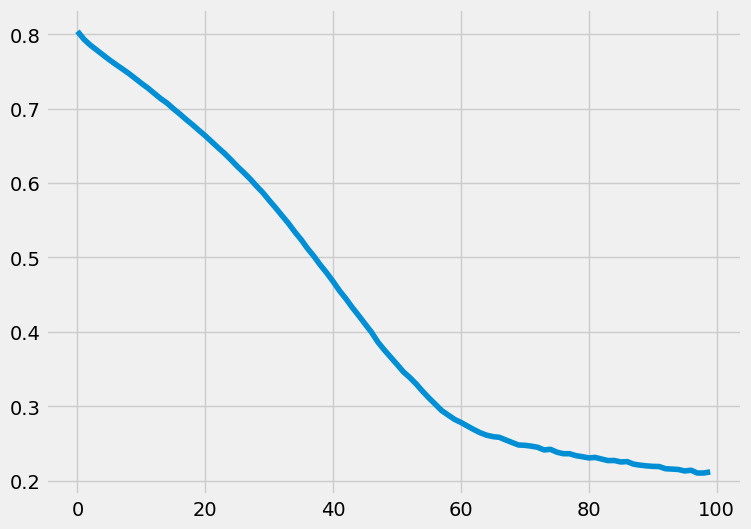

In [235]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [236]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-01-31",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[4,:]-=2.88
tahminler.iloc[9,:]+=0.22
tahminler.iloc[10,:]+=1.01
tahminler.iloc[11,:]+=0.33
tahminler

1/1 [==============================] - 0s 28ms/step


,TÜFE,Tahmin
2023-01-31,6.648943,6.323977
2023-02-28,3.145046,1.900850
2023-03-31,2.289480,2.277149
2023-04-30,2.385509,4.308465
2023-05-31,0.043076,-0.416906
2023-06-30,3.920498,4.892265
2023-07-31,9.488824,10.047257
2023-08-31,9.086793,7.574671
2023-09-30,4.753114,4.197906
2023-10-31,3.433981,2.348022


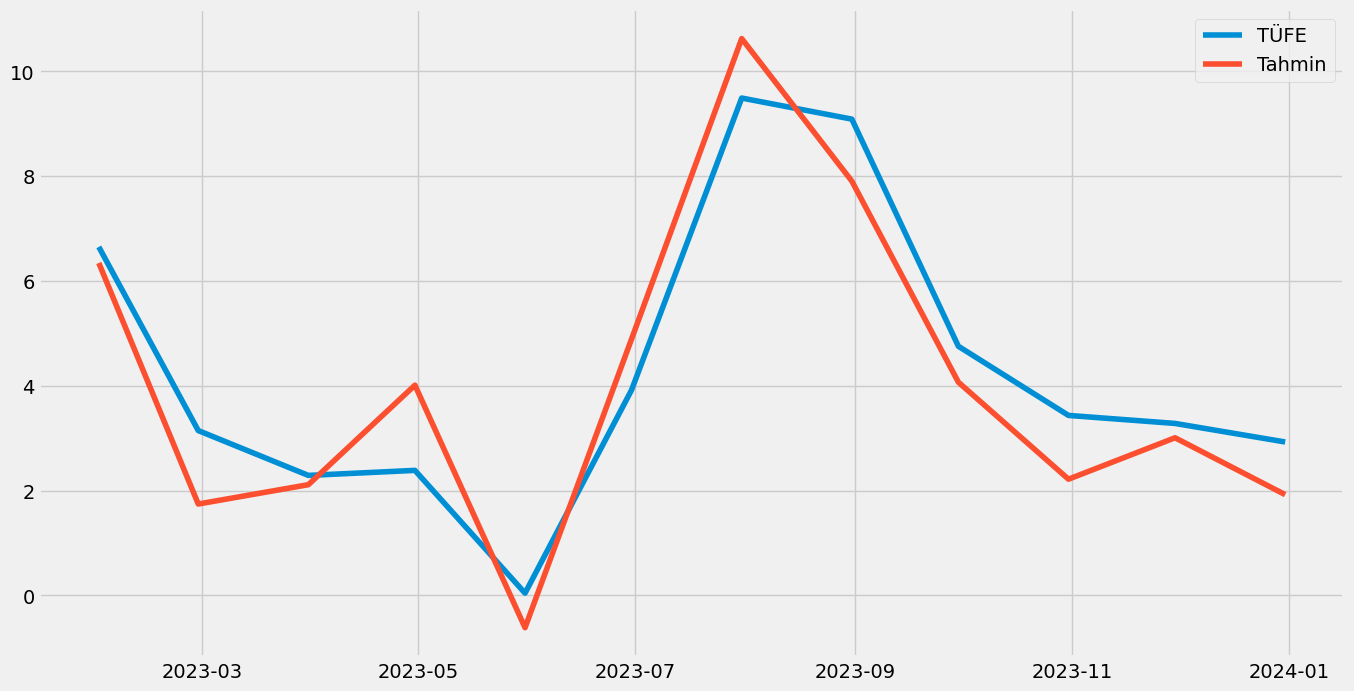

In [212]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="TÜFE")
plt.plot(tahminler["Tahmin"],label="Tahmin")
plt.legend()
plt.show()

In [147]:

from keras.regularizers import l2
import keras
keras.utils.set_random_seed(42)
model = Sequential()
model.add(LSTM(units=65,activation='tanh',input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X, y, epochs=100, batch_size=35,verbose=1)

Epoch 1/100
4/4 [==============================] - 3s 9ms/step - loss: 0.9743 - mean_squared_error: 0.9743
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9603 - mean_squared_error: 0.9603
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9485 - mean_squared_error: 0.9485
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9367 - mean_squared_error: 0.9367
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9267 - mean_squared_error: 0.9267
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9153 - mean_squared_error: 0.9153
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.9045 - mean_squared_error: 0.9045
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8937 - mean_squared_error: 0.8937
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8832 - mean_squared_error: 0.8832
Epoch 10/100
4/4 [===================

In [148]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-13:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-01-31",periods=13,freq="1M"))
pred

1/1 [==============================] - 1s 905ms/step


,TÜFE
2024-01-31,6.441013
2024-02-29,2.968708
2024-03-31,2.886807
2024-04-30,3.256963
2024-05-31,3.525562
2024-06-30,3.257882
2024-07-31,2.514065
2024-08-31,2.880557
2024-09-30,2.125964
2024-10-31,2.628636


In [149]:
tüfetahmin0 = []
result = 1859.38
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin0.append(result)

tüfetahmin0 = np.array(tüfetahmin0).reshape(-1, 1)
tüfetahmin0 = pd.DataFrame(tüfetahmin0)
tüfetahmin0.columns = ["LSTM"]
tüfetahmin0 = tüfetahmin0.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin0), freq="1M"))
tüfetahmin0

,LSTM
2024-01-31,1979.142914
2024-02-29,2037.897893
2024-03-31,2096.728067
2024-04-30,2165.017724
2024-05-31,2241.346768
2024-06-30,2314.367208
2024-07-31,2372.551905
2024-08-31,2440.894605
2024-09-30,2492.787144
2024-10-31,2558.313435


In [241]:
data.loc["2023-05-31","TÜFE"]+=2.88

In [150]:
features=['USD/TL', 'Motorin', 'Zam', 'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi',  'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi','Mevduat Faizi']
X=data[features]
y=data[["TÜFE"]]

y_pred=pd.DataFrame()
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=100, tol=1e-3))
            reg.fit(X_subset, y)
            y_pred[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])


            

In [151]:
y_pred.iloc[0,:].mean()

6.574088598761171

In [152]:
ocak=y_pred.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()


In [153]:
sonstd=y_pred.iloc[0,:].std()

In [154]:
new_df = pd.DataFrame()
for index, row in y_pred.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred=y_pred[cols.values]

In [155]:
def std(i):
   std=-1*(500*(y_pred.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -313
1    -309
2    -261
3    -262
4    -308
5    -287
6    -277
7    -273
8    -299
9    -283
10   -325
11   -275
12   -270
Name: 0, dtype: int64

In [156]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
sgdaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
sgdaylık.columns=["TÜFE"]
sgdaylık.iloc[0,0]=ocaktahmin
sgdaylık

,TÜFE
2024-01-31,6.899757
2024-02-29,3.360923
2024-03-31,3.183202
2024-04-30,3.347678
2024-05-31,3.440082
2024-06-30,3.238369
2024-07-31,2.893929
2024-08-31,3.264147
2024-09-30,2.637993
2024-10-31,3.080355


In [157]:

tüfetahmin1 = []
result = 1859.38
sgdaylık=np.array(sgdaylık).reshape(1,-1).ravel()
for i in range(len(sgdaylık)):
    result *= (1 + (sgdaylık[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["SGD Regressor"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,SGD Regressor
2024-01-31,1987.672709
2024-02-29,2054.476858
2024-03-31,2119.875014
2024-04-30,2190.841611
2024-05-31,2266.208358
2024-06-30,2339.596553
2024-07-31,2407.302819
2024-08-31,2485.880720
2024-09-30,2551.458076
2024-10-31,2630.052039


In [158]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred1=pd.DataFrame(index=pd.date_range(start="2023-12-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            model=LinearRegression()
            model.fit(X_subset, y)
            y_pred1[f'Tahmin_{r}_{selected_features}'] = model.predict(np.array(tahmindf[selected_features]))


In [160]:
sonstd=y_pred1.iloc[0,:].std()
ocak=y_pred1.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [161]:
new_df = pd.DataFrame()
for index, row in y_pred1.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred1=y_pred1[cols.values]

In [162]:
def std(i):
   std=-1*(500*(y_pred1.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(14))
for i in range(14):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -311
1    -298
2    -238
3    -244
4    -305
5    -283
6    -267
7    -264
8    -278
9    -274
10   -310
11   -280
12   -264
13   -289
Name: 0, dtype: int64

In [163]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred1.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
linearaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
linearaylık.columns=["TÜFE"]
linearaylık.iloc[0,0]=ocaktahmin
linearaylık

,TÜFE
2024-01-31,6.772608
2024-02-29,3.153671
2024-03-31,3.093039
2024-04-30,3.206345
2024-05-31,3.172020
2024-06-30,3.054162
2024-07-31,2.734184
2024-08-31,3.133830
2024-09-30,2.524167
2024-10-31,2.972132


In [164]:
linearaylık=np.array(linearaylık)
linearaylık=linearaylık.ravel()
tüfetahmin2=[]
result=1859.38
for i in range(len(linearaylık)):
    result *= (1 + linearaylık[i] / 100)
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["Linear Regression"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2


,Linear Regression
2024-01-31,1985.308521
2024-02-29,2047.918619
2024-03-31,2111.261544
2024-04-30,2178.955872
2024-05-31,2248.072787
2024-06-30,2316.732576
2024-07-31,2380.076299
2024-08-31,2454.663842
2024-09-30,2516.623656
2024-10-31,2591.421042


In [165]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred2=pd.DataFrame(index=pd.date_range(start="2023-12-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            reg = linear_model.Lasso(alpha=0.001)
            reg.fit(X_subset,y)
            y_pred2[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])

In [166]:
sonstd=y_pred2.iloc[0,:].std()
ocak=y_pred2.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [167]:
new_df = pd.DataFrame()
for index, row in y_pred2.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred2=y_pred2[cols.values]

In [168]:
def std(i):
   std=-1*(500*(y_pred2.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(14))
for i in range(14):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1


0    -311
1    -298
2    -237
3    -243
4    -305
5    -282
6    -266
7    -264
8    -278
9    -273
10   -310
11   -280
12   -264
13   -288
Name: 0, dtype: int64

In [169]:
import numpy as np
import matplotlib.pyplot as plt
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred2.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
lassoaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
lassoaylık.columns=["TÜFE"]
lassoaylık.iloc[0,0]=ocaktahmin
lassoaylık

,TÜFE
2024-01-31,6.772716
2024-02-29,3.152158
2024-03-31,3.082130
2024-04-30,3.214466
2024-05-31,3.136561
2024-06-30,3.046123
2024-07-31,2.763019
2024-08-31,3.147960
2024-09-30,2.523840
2024-10-31,2.977000


In [170]:



tüfetahmin5 = []
result = 1859.38
lassoaylık=np.array(lassoaylık).ravel()
for i in range(len(lassoaylık)):
    result *= (1 + lassoaylık[i] / 100)
    tüfetahmin5.append(result)

tüfetahmin5 = np.array(tüfetahmin5).reshape(-1, 1)
tüfetahmin5 = pd.DataFrame(tüfetahmin5)
tüfetahmin5.columns = ["Lasso Regression"]
tüfetahmin5 = tüfetahmin5.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin5), freq="1M"))
tüfetahmin5

,Lasso Regression
2024-01-31,1985.310530
2024-02-29,2047.890649
2024-03-31,2111.009303
2024-04-30,2178.866971
2024-05-31,2247.208455
2024-06-30,2315.661187
2024-07-31,2379.643344
2024-08-31,2454.553564
2024-09-30,2516.502559
2024-10-31,2591.418843


In [171]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred3=pd.DataFrame(index=pd.date_range(start="2023-12-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            reg = linear_model.Lars(random_state=0)
            reg.fit(X_subset,y)
            y_pred3[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred3.iloc[0,:].std()

In [172]:
ocak=y_pred3.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [173]:
new_df = pd.DataFrame()
for index, row in y_pred3.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred3=y_pred3[cols.values]


In [174]:
def std(i):
   std=-1*(400*(y_pred3.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(14))
for i in range(14):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1


0    -261
1    -241
2    -227
3    -233
4    -280
5    -268
6    -259
7    -242
8    -254
9    -259
10   -291
11   -263
12   -257
13   -265
Name: 0, dtype: int64

In [175]:

average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred3.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
larsaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-30",periods=13,freq="M"))
larsaylık.columns=["TÜFE"]
larsaylık.iloc[0,0]=ocaktahmin
larsaylık

,TÜFE
2024-01-31,6.754687
2024-02-29,3.251227
2024-03-31,3.064899
2024-04-30,3.175906
2024-05-31,3.087302
2024-06-30,2.858343
2024-07-31,2.660823
2024-08-31,3.134721
2024-09-30,2.497204
2024-10-31,2.915148


In [176]:



tüfetahmin6 = []
result = 1859.38
larstahmin=np.array(larsaylık).ravel()
for i in range(len(larstahmin)):
    result *= (1 + larstahmin[i] / 100)
    tüfetahmin6.append(result)

tüfetahmin6 = np.array(tüfetahmin6).reshape(-1, 1)
tüfetahmin6 = pd.DataFrame(tüfetahmin6)
tüfetahmin6.columns = ["Lars Regression"]
tüfetahmin6 = tüfetahmin6.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin6), freq="1M"))
tüfetahmin6


,Lars Regression
2024-01-31,1984.975302
2024-02-29,2049.511358
2024-03-31,2112.326805
2024-04-30,2179.412322
2024-05-31,2246.697366
2024-06-30,2310.915689
2024-07-31,2372.405054
2024-08-31,2446.773336
2024-09-30,2507.874258
2024-10-31,2580.982494


In [177]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred4=pd.DataFrame(index=pd.date_range(start="2023-12-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            krr = KernelRidge()
            krr.fit(X_subset,y)
            y_pred4[f'Tahmin_{r}_{selected_features}'] = krr.predict(tahmindf[selected_features])
sonstd=y_pred4.iloc[0,:].std()

In [178]:
ocak=y_pred4.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [179]:
new_df = pd.DataFrame()
for index, row in y_pred4.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred4=y_pred4[cols.values]

In [180]:
def std(i):
   std=-1*(500*(y_pred4.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -312
1    -296
2    -268
3    -262
4    -292
5    -279
6    -277
7    -272
8    -302
9    -279
10   -307
11   -275
12   -275
Name: 0, dtype: int64

In [181]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred4.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
kernelaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
kernelaylık.columns=["TÜFE"]
kernelaylık.iloc[0,0]=ocaktahmin
kernelaylık

,TÜFE
2024-01-31,7.140747
2024-02-29,3.474820
2024-03-31,3.344770
2024-04-30,3.434992
2024-05-31,3.573811
2024-06-30,3.380848
2024-07-31,3.027006
2024-08-31,3.428789
2024-09-30,2.776351
2024-10-31,3.277676


In [182]:


tüfetahmin7 = []
result = 1859.38
krrtahmin=np.array(kernelaylık).ravel()
for i in range(len(krrtahmin)):
    result *= (1 + krrtahmin[i] / 100)
    tüfetahmin7.append(result)

tüfetahmin7 = np.array(tüfetahmin7).reshape(-1, 1)
tüfetahmin7 = pd.DataFrame(tüfetahmin7)
tüfetahmin7.columns = ["Kernel Regression"]
tüfetahmin7 = tüfetahmin7.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin7), freq="1M"))
tüfetahmin7

,Kernel Regression
2024-01-31,1992.153629
2024-02-29,2061.377377
2024-03-31,2130.325715
2024-04-30,2203.502235
2024-05-31,2282.251236
2024-06-30,2359.410673
2024-07-31,2430.830182
2024-08-31,2514.178223
2024-09-30,2583.980628
2024-10-31,2668.675132


In [183]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred5=pd.DataFrame(index=pd.date_range(start="2024-01-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            kernel = DotProduct() + WhiteKernel()
            gpr = GaussianProcessRegressor(kernel=kernel)
            gpr.fit(X_subset, y)
            y_pred5[f'Tahmin_{r}_{selected_features}'] = gpr.predict(tahmindf[selected_features])
sonstd=y_pred5.iloc[0,:].std()


In [184]:
ocak=y_pred5.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [185]:
new_df = pd.DataFrame()
for index, row in y_pred5.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred5=y_pred5[cols.values]

In [186]:
def std(i):
   std=-1*(500*(y_pred5.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -311
1    -298
2    -245
3    -248
4    -301
5    -280
6    -269
7    -268
8    -285
9    -277
10   -310
11   -283
12   -267
Name: 0, dtype: int64

In [187]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred5.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
gaussaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
gaussaylık.columns=["TÜFE"]
gaussaylık.iloc[0,0]=ocaktahmin
gaussaylık

,TÜFE
2024-01-31,6.852732
2024-02-29,3.320479
2024-03-31,3.143453
2024-04-30,3.252484
2024-05-31,3.209175
2024-06-30,3.111964
2024-07-31,2.828626
2024-08-31,3.240187
2024-09-30,2.580992
2024-10-31,3.007448


In [188]:


tüfe = 1859.38  
tüfetahmin8 = []
gaustahmin=np.array(gaussaylık).ravel()
gaustahmin=1+(gaustahmin/100)
for elem in gaustahmin:
    tüfe *= elem  
    tüfetahmin8.append(tüfe)
tüfetahmin8=pd.DataFrame(tüfetahmin8)
tüfetahmin8=tüfetahmin8.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin8),freq="1M"))
tüfetahmin8.columns=["Gaussian Regression"]

tüfetahmin8
        

,Gaussian Regression
2024-01-31,1986.798322
2024-02-29,2052.769534
2024-03-31,2117.297385
2024-04-30,2186.162140
2024-05-31,2256.319908
2024-06-30,2326.535770
2024-07-31,2392.344761
2024-08-31,2469.861213
2024-09-30,2533.608144
2024-10-31,2609.805083


In [189]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred6=pd.DataFrame(index=pd.date_range(start="2024-01-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            reg = linear_model.BayesianRidge()
            reg.fit(X_subset, y)
            y_pred6[f'Tahmin_{r}_{selected_features}'] = reg.predict(tahmindf[selected_features])
sonstd=y_pred6.iloc[0,:].std()


In [190]:
ocak=y_pred6.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [191]:
new_df = pd.DataFrame()
for index, row in y_pred6.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred6=y_pred6[cols.values]

In [192]:
def std(i):
   std=-1*(500*(y_pred6.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -330
1    -340
2    -271
3    -271
4    -320
5    -302
6    -297
7    -295
8    -316
9    -301
10   -344
11   -310
12   -292
Name: 0, dtype: int64

In [193]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred6.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
bayesaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
bayesaylık.columns=["TÜFE"]
bayesaylık.iloc[0,0]=ocaktahmin
bayesaylık

,TÜFE
2024-01-31,6.844347
2024-02-29,3.254825
2024-03-31,3.087459
2024-04-30,3.233571
2024-05-31,3.212260
2024-06-30,3.123172
2024-07-31,2.752540
2024-08-31,3.172380
2024-09-30,2.471758
2024-10-31,2.990693


In [194]:



tüfe = 1859.38
tüfetahmin9 = []
bayestahmin=np.array(bayesaylık).ravel()
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  
    tüfetahmin9.append(tüfe)
tüfetahmin9=pd.DataFrame(tüfetahmin9)
tüfetahmin9=tüfetahmin9.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin9),freq="1M"))
tüfetahmin9.columns=["Bayessian Regression"]

tüfetahmin9

,Bayessian Regression
2024-01-31,1986.642422
2024-02-29,2051.304151
2024-03-31,2114.637328
2024-04-30,2183.015637
2024-05-31,2253.139785
2024-06-30,2323.509221
2024-07-31,2387.464752
2024-08-31,2463.204207
2024-09-30,2524.088649
2024-10-31,2599.576393


In [195]:
"""pred1=pd.DataFrame(pred,index=pd.date_range(start="2024-01-30",periods=14,freq="1M"))
pred1=pred1[0]"""

'pred1=pd.DataFrame(pred,index=pd.date_range(start="2024-01-30",periods=14,freq="1M"))\npred1=pred1[0]'

In [196]:
"""


tüfetahmin19 = []
result = 1859.38
lstmtahmin=pred1
for i in range(len(lstmtahmin)):
    result *= (1 + lstmtahmin[i] / 100)
    tüfetahmin19.append(result)

tüfetahmin19 = np.array(tüfetahmin19).reshape(-1, 1)
tüfetahmin19 = pd.DataFrame(tüfetahmin19)
tüfetahmin19.columns = ["LSTM"]
tüfetahmin19 = tüfetahmin19.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin19), freq="1M"))
tüfetahmin19"""

'\n\n\ntüfetahmin19 = []\nresult = 1859.38\nlstmtahmin=pred1\nfor i in range(len(lstmtahmin)):\n    result *= (1 + lstmtahmin[i] / 100)\n    tüfetahmin19.append(result)\n\ntüfetahmin19 = np.array(tüfetahmin19).reshape(-1, 1)\ntüfetahmin19 = pd.DataFrame(tüfetahmin19)\ntüfetahmin19.columns = ["LSTM"]\ntüfetahmin19 = tüfetahmin19.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin19), freq="1M"))\ntüfetahmin19'

In [197]:
features=['USD/TL', 'Motorin', 'Zam',  'Enflasyon Belirsizliği',
       'ParaArzi', 'Borç', 'Kredi', 'Mevduat Faizi', 'REDK', 'REDKT',
       'İşsizlik', 'Politika Faizi']
X=data[features]
y=data[["TÜFE"]]
y_pred7=pd.DataFrame(index=pd.date_range(start="2024-01-30",freq="M",periods=14))
for r in range(5, 11):
        for combo in combinations(features, r):
            selected_features = list(combo)
            if 'Zam' not in selected_features:
                  selected_features.append('Zam')
            X_subset = X[selected_features]
            model = sm.RLM(y, X_subset, M=sm.robust.norms.HuberT()).fit()
            y_pred7[f'Tahmin_{r}_{selected_features}'] = model.predict(tahmindf[selected_features])
sonstd=y_pred7.iloc[0,:].std()


In [198]:
ocak=y_pred7.iloc[0,:]
ocaktahmin=ocak[(ocak>np.quantile(ocak,0.25))].mean()

In [199]:
new_df = pd.DataFrame()
for index, row in y_pred7.iterrows():
    # Satırdaki eşik değerleri belirleyelim
    thresholds = row.quantile(0.75)
    
    # Satırdaki değerleri eşik değerleri ile karşılaştırarak işlem yapalım
    filtered_row = row <= thresholds
    
    # Yeni DataFrame'e ekleyelim
    new_df = pd.concat([new_df, pd.DataFrame(filtered_row).transpose()], ignore_index=True)
cols=new_df[new_df==True].dropna(axis=1).columns
y_pred7=y_pred7[cols.values]

In [200]:
def std(i):
   std=-1*(500*(y_pred7.iloc[i,:].std())/sonstd)
   std=int(std)
   return std
std1=pd.DataFrame(index=range(13))
for i in range(13):
   std1[str(i)]=std(i)
std1=std1.iloc[0,:]
std1

0    -340
1    -330
2    -319
3    -310
4    -328
5    -325
6    -333
7    -325
8    -353
9    -333
10   -359
11   -332
12   -313
Name: 0, dtype: int64

In [201]:
average_of_most_frequent=[]
for i in range(13):
   hist, edges = np.histogram(y_pred7.iloc[i,:], bins=1000)
   max_freq_indices = np.argsort(hist)[std1[i]:]
   most_frequent_values = [(edges[i] + edges[i + 1]) / 2 for i in max_freq_indices]
   average_of_most_frequent.append(np.mean(most_frequent_values))
robustaylık=pd.DataFrame(average_of_most_frequent,index=pd.date_range(start="2024-01-31",periods=13,freq="M"))
robustaylık.columns=["TÜFE"]
robustaylık.iloc[0,0]=ocaktahmin
robustaylık

,TÜFE
2024-01-31,7.098779
2024-02-29,3.208612
2024-03-31,3.190119
2024-04-30,3.287408
2024-05-31,3.347915
2024-06-30,3.166599
2024-07-31,2.902526
2024-08-31,3.195339
2024-09-30,2.690381
2024-10-31,3.042087


In [202]:


robusttahmin=np.array(robustaylık).ravel()

tüfetahmin21 = []
result = 1859.38
for i in range(len(robusttahmin)):
    result *= (1 + robusttahmin[i] / 100)
    tüfetahmin21.append(result)

tüfetahmin21 = np.array(tüfetahmin21).reshape(-1, 1)
tüfetahmin21 = pd.DataFrame(tüfetahmin21)
tüfetahmin21.columns = ["Robust Regression"]
tüfetahmin21 = tüfetahmin21.set_index(pd.date_range(start="2024-01-30", periods=len(tüfetahmin21), freq="1M"))
tüfetahmin21

,Robust Regression
2024-01-31,1991.373273
2024-02-29,2055.268717
2024-03-31,2120.834226
2024-04-30,2190.554702
2024-05-31,2263.892621
2024-06-30,2335.581022
2024-07-31,2403.371869
2024-08-31,2480.167757
2024-09-30,2546.893710
2024-10-31,2624.372431


In [203]:
tüfetahmin=pd.DataFrame()
tüfetahmin["SGD Regressor"]=tüfetahmin1["SGD Regressor"]
tüfetahmin["Linear Regression"]=tüfetahmin2["Linear Regression"]
tüfetahmin["Lasso Regression"]=tüfetahmin5["Lasso Regression"]
tüfetahmin["Lars Regression"]=tüfetahmin6["Lars Regression"]
tüfetahmin["Kernel Regression"]=tüfetahmin7["Kernel Regression"]
tüfetahmin["Gaussian Regression"]=tüfetahmin8["Gaussian Regression"]
tüfetahmin["Bayessian Regression"]=tüfetahmin9["Bayessian Regression"]
tüfetahmin["LSTM"]=tüfetahmin0["LSTM"]
tüfetahmin["Robust Regression"]=tüfetahmin21["Robust Regression"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-01-31,1987.672709,1985.308521,1985.310530,1984.975302,1992.153629,1986.798322,1986.642422,1979.142914,1991.373273,1986.597514
2024-02-29,2054.476858,2047.918619,2047.890649,2049.511358,2061.377377,2052.769534,2051.304151,2037.897893,2055.268717,2050.935017
2024-03-31,2119.875014,2111.261544,2111.009303,2112.326805,2130.325715,2117.297385,2114.637328,2096.728067,2120.834226,2114.921710
2024-04-30,2190.841611,2178.955872,2178.866971,2179.412322,2203.502235,2186.162140,2183.015637,2165.017724,2190.554702,2184.036579
2024-05-31,2266.208358,2248.072787,2247.208455,2246.697366,2282.251236,2256.319908,2253.139785,2241.346768,2263.892621,2256.126365
2024-06-30,2339.596553,2316.732576,2315.661187,2310.915689,2359.410673,2326.535770,2323.509221,2314.367208,2335.581022,2326.923322
2024-07-31,2407.302819,2380.076299,2379.643344,2372.405054,2430.830182,2392.344761,2387.464752,2372.551905,2403.371869,2391.776776
2024-08-31,2485.880720,2454.663842,2454.553564,2446.773336,2514.178223,2469.861213,2463.204207,2440.894605,2480.167757,2467.797496
2024-09-30,2551.458076,2516.623656,2516.502559,2507.874258,2583.980628,2533.608144,2524.088649,2492.787144,2546.893710,2530.424092
2024-10-31,2630.052039,2591.421042,2591.418843,2580.982494,2668.675132,2609.805083,2599.576393,2558.313435,2624.372431,2606.068543


In [204]:
dates=pd.date_range('2006-02-01','2024-01-01' , freq='1M')
df=pd.DataFrame()

df["CPI"]=inflation["TÜFE"]
df=df.set_index(dates)





dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[1:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[1:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]

dfas8=pd.DataFrame()
dfas8=pd.concat([df["CPI"],tüfetahmin.iloc[1:,6]],axis=0)
dfas8=pd.DataFrame(dfas8)
dfas8.columns=[tüfetahmin.columns[6]]

dfas9=pd.DataFrame()
dfas9=pd.concat([df["CPI"],tüfetahmin.iloc[1:,7]],axis=0)
dfas9=pd.DataFrame(dfas9)
dfas9.columns=[tüfetahmin.columns[7]]

dfas10=pd.DataFrame()
dfas10=pd.concat([df["CPI"],tüfetahmin.iloc[1:,8]],axis=0)
dfas10=pd.DataFrame(dfas10)
dfas10.columns=[tüfetahmin.columns[8]]





dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6,dfas7,dfas8,dfas9,dfas10],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [205]:

tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-01-31,1987.672709,1985.308521,1985.310530,1984.975302,1992.153629,1986.798322,1986.642422,1979.142914,1991.373273,1986.597514
2024-02-29,2054.476858,2047.918619,2047.890649,2049.511358,2061.377377,2052.769534,2051.304151,2037.897893,2055.268717,2050.935017
2024-03-31,2119.875014,2111.261544,2111.009303,2112.326805,2130.325715,2117.297385,2114.637328,2096.728067,2120.834226,2114.921710
2024-04-30,2190.841611,2178.955872,2178.866971,2179.412322,2203.502235,2186.162140,2183.015637,2165.017724,2190.554702,2184.036579
2024-05-31,2266.208358,2248.072787,2247.208455,2246.697366,2282.251236,2256.319908,2253.139785,2241.346768,2263.892621,2256.126365
2024-06-30,2339.596553,2316.732576,2315.661187,2310.915689,2359.410673,2326.535770,2323.509221,2314.367208,2335.581022,2326.923322
2024-07-31,2407.302819,2380.076299,2379.643344,2372.405054,2430.830182,2392.344761,2387.464752,2372.551905,2403.371869,2391.776776
2024-08-31,2485.880720,2454.663842,2454.553564,2446.773336,2514.178223,2469.861213,2463.204207,2440.894605,2480.167757,2467.797496
2024-09-30,2551.458076,2516.623656,2516.502559,2507.874258,2583.980628,2533.608144,2524.088649,2492.787144,2546.893710,2530.424092
2024-10-31,2630.052039,2591.421042,2591.418843,2580.982494,2668.675132,2609.805083,2599.576393,2558.313435,2624.372431,2606.068543


In [206]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/1859.38)-1)*100)
row=row.T
row


,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-01-31,6.899757,6.772608,6.772716,6.754687,7.140747,6.852732,6.844347,6.441013,7.098779,6.841932


In [207]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama
2024-01-31,6.899757,6.772608,6.772716,6.754687,7.140747,6.852732,6.844347,6.441013,7.098779,6.841932
2024-02-29,3.360923,3.153671,3.152158,3.251227,3.474820,3.320479,3.254825,2.968708,3.208612,3.238578
2024-03-31,3.183202,3.093039,3.082130,3.064899,3.344770,3.143453,3.087459,2.886807,3.190119,3.119879
2024-04-30,3.347678,3.206345,3.214466,3.175906,3.434992,3.252484,3.233571,3.256963,3.287408,3.267964
2024-05-31,3.440082,3.172020,3.136561,3.087302,3.573811,3.209175,3.212260,3.525562,3.347915,3.300759
2024-06-30,3.238369,3.054162,3.046123,2.858343,3.380848,3.111964,3.123172,3.257882,3.166599,3.137987
2024-07-31,2.893929,2.734184,2.763019,2.660823,3.027006,2.828626,2.752540,2.514065,2.902526,2.787090
2024-08-31,3.264147,3.133830,3.147960,3.134721,3.428789,3.240187,3.172380,2.880557,3.195339,3.178420
2024-09-30,2.637993,2.524167,2.523840,2.497204,2.776351,2.580992,2.471758,2.125964,2.690381,2.537753
2024-10-31,3.080355,2.972132,2.977000,2.915148,3.277676,3.007448,2.990693,2.628636,3.042087,2.989398


In [208]:
aylıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [209]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-01-31    0.205144
2024-02-29    0.144185
2024-03-31    0.122789
2024-04-30    0.080084
2024-05-31    0.177499
2024-06-30    0.149504
2024-07-31    0.149615
2024-08-31    0.144790
2024-09-30    0.183056
2024-10-31    0.169770
2024-11-30    0.193038
2024-12-31    0.176445
2025-01-31    0.152840
dtype: float64

In [210]:
aylıktahmin["Maksimum"]=aylıktahmin.iloc[:,:-1].max(axis=1)
aylıktahmin["Minimum"]=aylıktahmin.iloc[:,:-1].min(axis=1)-std.mean()
#aylıktahmin.iloc[0,-3]=(aylıktahmin.iloc[0,:7].sum()+aylıktahmin.iloc[0,-4])/8 
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama,Maksimum,Minimum
2024-01-31,6.899757,6.772608,6.772716,6.754687,7.140747,6.852732,6.844347,6.441013,7.098779,6.841932,7.140747,6.283417
2024-02-29,3.360923,3.153671,3.152158,3.251227,3.474820,3.320479,3.254825,2.968708,3.208612,3.238578,3.474820,2.811111
2024-03-31,3.183202,3.093039,3.082130,3.064899,3.344770,3.143453,3.087459,2.886807,3.190119,3.119879,3.344770,2.729210
2024-04-30,3.347678,3.206345,3.214466,3.175906,3.434992,3.252484,3.233571,3.256963,3.287408,3.267964,3.434992,3.018309
2024-05-31,3.440082,3.172020,3.136561,3.087302,3.573811,3.209175,3.212260,3.525562,3.347915,3.300759,3.573811,2.929705
2024-06-30,3.238369,3.054162,3.046123,2.858343,3.380848,3.111964,3.123172,3.257882,3.166599,3.137987,3.380848,2.700746
2024-07-31,2.893929,2.734184,2.763019,2.660823,3.027006,2.828626,2.752540,2.514065,2.902526,2.787090,3.027006,2.356468
2024-08-31,3.264147,3.133830,3.147960,3.134721,3.428789,3.240187,3.172380,2.880557,3.195339,3.178420,3.428789,2.722960
2024-09-30,2.637993,2.524167,2.523840,2.497204,2.776351,2.580992,2.471758,2.125964,2.690381,2.537753,2.776351,1.968367
2024-10-31,3.080355,2.972132,2.977000,2.915148,3.277676,3.007448,2.990693,2.628636,3.042087,2.989398,3.277676,2.471039


In [211]:
tüfe = 1859.38# İlk değeri 1691 ile başlatıyoruz
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [212]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin12 = []
krrtahmin=aylıktahmin["Gaussian Regression"]
krrtahmin=1+(krrtahmin/100)
for elem in krrtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin12.append(tüfe)
tüfetahmin12=pd.DataFrame(tüfetahmin12)
tüfetahmin12=tüfetahmin12.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin12),freq="1M"))
tüfetahmin12.columns=["CPI"]
tüfetahmin12=pd.concat([df["CPI"],tüfetahmin12["CPI"]],axis=0)
tüfetahmin12=pd.DataFrame((tüfetahmin12.pct_change(periods=12)*100).tail(38))


In [213]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin13 = []
bayestahmin=aylıktahmin["SGD Regressor"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin13.append(tüfe)
tüfetahmin13=pd.DataFrame(tüfetahmin13)
tüfetahmin13=tüfetahmin13.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin13),freq="1M"))
tüfetahmin13.columns=["CPI"]
tüfetahmin13=pd.concat([df["CPI"],tüfetahmin13["CPI"]],axis=0)
tüfetahmin13=pd.DataFrame((tüfetahmin13.pct_change(periods=12)*100).tail(38))


In [214]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin14 = []
lassotahmin=aylıktahmin["Lasso Regression"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [215]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin15 = []
larstahmin=aylıktahmin["Lars Regression"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [216]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin16 = []
kerneltahmin=aylıktahmin["Kernel Regression"]
kerneltahmin=1+(kerneltahmin/100)
for elem in kerneltahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))

In [217]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin17 = []
bayestahmin=aylıktahmin["Bayessian Regression"]
bayestahmin=1+(bayestahmin/100)
for elem in bayestahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [218]:
tüfe = 1859.38# İlk değeri 1691 ile başlatıyoruz
tüfetahmin18 = []
lineartahmin=aylıktahmin["Linear Regression"]
lineartahmin=1+(lineartahmin/100)
for elem in lineartahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))


In [219]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin20 = []
lstmtahmin=aylıktahmin["LSTM"]
lstmtahmin=1+(lstmtahmin/100)
for elem in lstmtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin20.append(tüfe)
tüfetahmin20=pd.DataFrame(tüfetahmin20)
tüfetahmin20=tüfetahmin20.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin20),freq="1M"))
tüfetahmin20.columns=["CPI"]
tüfetahmin20=pd.concat([df["CPI"],tüfetahmin20["CPI"]],axis=0)
tüfetahmin20=pd.DataFrame((tüfetahmin20.pct_change(periods=12)*100).tail(38))

In [220]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin22 = []
robusttahmin=aylıktahmin["Robust Regression"]
robusttahmin=1+(robusttahmin/100)
for elem in robusttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin22.append(tüfe)
tüfetahmin22=pd.DataFrame(tüfetahmin22)
tüfetahmin22=tüfetahmin22.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin22),freq="1M"))
tüfetahmin22.columns=["CPI"]
tüfetahmin22=pd.concat([df["CPI"],tüfetahmin22["CPI"]],axis=0)
tüfetahmin22=pd.DataFrame((tüfetahmin22.pct_change(periods=12)*100).tail(38))


In [221]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2021-12-31,36.080902
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494


In [222]:
tüfe = 1859.38 # İlk değeri 1691 ile başlatıyoruz
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-01-30",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2021-12-31,36.080902
2022-01-31,48.690824
2022-02-28,54.438567
2022-03-31,61.144538
2022-04-30,69.971070
2022-05-31,73.495950
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494


In [223]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [224]:
aylık1=aylıktahmin
aylık1=aylık1[["Ortalama"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

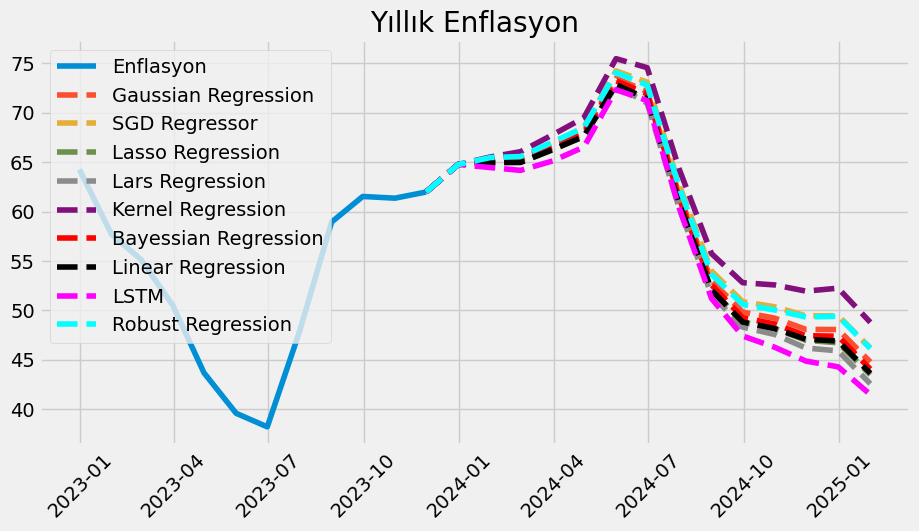

In [225]:
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["SGD Regressor"]=tüfetahmin13["CPI"]
yıllıktahmin["Gaussian Regression"]=tüfetahmin12["CPI"]
yıllıktahmin["Lasso Regression"]=tüfetahmin14["CPI"]
yıllıktahmin["Lars Regression"]=tüfetahmin15["CPI"]
yıllıktahmin["Kernel Regression"]=tüfetahmin16["CPI"]
yıllıktahmin["Bayessian Regression"]=tüfetahmin17["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["Linear Regression"]=tüfetahmin18["CPI"]
yıllıktahmin["LSTM"]=tüfetahmin20["CPI"]
yıllıktahmin["Robust Regression"]=tüfetahmin22["CPI"]
plt.figure(figsize=(10,5))
plt.plot(yıllıktahmin["Ortalama"].iloc[12:24],label="Enflasyon")
plt.plot(yıllıktahmin["Gaussian Regression"].iloc[23:],'--',label="Gaussian Regression")
plt.plot(yıllıktahmin["SGD Regressor"].iloc[23:],'--',label="SGD Regressor")
plt.plot(yıllıktahmin["Lasso Regression"].iloc[23:],'--',label="Lasso Regression")
plt.plot(yıllıktahmin["Lars Regression"].iloc[23:],'--',label="Lars Regression")
plt.plot(yıllıktahmin["Kernel Regression"].iloc[23:],'--',label="Kernel Regression")
plt.plot(yıllıktahmin["Bayessian Regression"].iloc[23:],'--',label="Bayessian Regression",color="red")
plt.plot(yıllıktahmin["Linear Regression"].iloc[23:],'--',label="Linear Regression",color="black")
plt.plot(yıllıktahmin["LSTM"].iloc[23:],'--',label="LSTM",color="magenta")
plt.plot(yıllıktahmin["Robust Regression"].iloc[23:],'--',label="Robust Regression",color="cyan")
plt.legend(loc=0)
plt.xticks(rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [226]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,Maksimum,Minimum
2021-12-31,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494


In [227]:
yıllıktahmin["Ortalama"]=yıllıktahmin.iloc[:,1:-2].mean(axis=1)
yıllıktahmin.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')
yıllıktahmin


,Ortalama,SGD Regressor,Gaussian Regression,Lasso Regression,Lars Regression,Kernel Regression,Bayessian Regression,Linear Regression,LSTM,Robust Regression,Maksimum,Minimum
2021-12-31,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902,36.080902
2022-01-31,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824,48.690824
2022-02-28,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567,54.438567
2022-03-31,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538,61.144538
2022-04-30,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070,69.971070
2022-05-31,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950,73.495950
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494


In [228]:
sonu2023=str(yıllıktahmin.iloc[24,0])[:5]
tepe=str(yıllıktahmin.iloc[29,0])[:5]
sonu2024=str(yıllıktahmin.iloc[36,0])[:5]
max=str(yıllıktahmin.iloc[-2,-3])[:5]
min=str(yıllıktahmin.iloc[-2,-2])[:5]


In [229]:
min1=str(yıllıktahmin.iloc[36,-1])[:2]
max1=str(yıllıktahmin.iloc[36,-2])[:2]

In [230]:
min1

'40'

In [231]:
cariay=evds.get_data(["TP.PKAUO.S01.A.U"],startdate="01-11-2022",enddate="31-01-2024")
cariay=cariay.set_index(pd.date_range(start="2022-11-30",periods=15,freq="1M"))
del cariay["Tarih"]
cariay.columns=["Cari Ay Medyan Tahmin"]
cariay["TÜFE"]=df.iloc[-14:,0].shift(1).dropna()
cariay["Cari Ay Medyan Tahmin"]=1+(cariay["Cari Ay Medyan Tahmin"]/100)
cariay.iloc[-1,1]=1859.38
cariay["Enflasyon"]=cariay["Cari Ay Medyan Tahmin"]*cariay["TÜFE"]
cariay["TÜFE Önceki"]=df.iloc[-25:,0].shift(12).dropna()
cariay.iloc[-1,3]=1203.48
cariay["Enflasyon"]=((cariay["Enflasyon"]/cariay["TÜFE Önceki"])-1)*100
cariay

,Cari Ay Medyan Tahmin,TÜFE,Enflasyon,TÜFE Önceki
2022-11-30,1.0314,NaN,NaN,NaN
2022-12-31,1.0269,1115.26,66.716718,686.95
2023-01-31,1.0265,1128.45,51.769968,763.23
2023-02-28,1.0301,1203.48,54.976654,799.93
2023-03-31,1.0288,1241.33,51.377401,843.64
2023-04-30,1.0265,1269.75,44.055347,904.79
2023-05-31,1.0241,1300.04,42.887757,931.76
2023-06-30,1.0281,1300.60,36.736564,977.90
2023-07-31,1.0376,1351.59,40.096679,1001.03
2023-08-31,1.0554,1479.84,53.775724,1015.65


In [232]:
ay1sonra=evds.get_data(["TP.PKAUO.S01.B.U"],startdate="01-01-2024",enddate="31-01-2024")
ay1sonra["TÜFE"]=1959.97
ay1sonra["TÜFE Yeni"]=(1+(ay1sonra["TP_PKAUO_S01_B_U"]/100))*ay1sonra["TÜFE"]
ay1sonra["TÜFE Eski"]=df.loc["2023-02-28"]["CPI"]
ay1sonra["Enflasyon"]=((ay1sonra["TÜFE Yeni"]/ay1sonra["TÜFE Eski"])-1)*100
ay1sonra

,Tarih,TP_PKAUO_S01_B_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-1,3.51,1959.97,2028.764947,1241.33,63.434779


In [233]:
ay2sonra=evds.get_data(["TP.BEK.S01.C.U"],startdate="01-01-2024",enddate="31-12-2024")
ay2sonra["TÜFE"]=2028.7649
ay2sonra["TÜFE Yeni"]=(1+(ay2sonra["TP_BEK_S01_C_U"]/100))*ay2sonra["TÜFE"]
ay2sonra["TÜFE Eski"]=df.loc["2023-03-31"]["CPI"]
ay2sonra["Enflasyon"]=((ay2sonra["TÜFE Yeni"]/ay2sonra["TÜFE Eski"])-1)*100
ay2sonra

,Tarih,TP_BEK_S01_C_U,TÜFE,TÜFE Yeni,TÜFE Eski,Enflasyon
0,2024-1,3.1,2028.7649,2091.656612,1269.75,64.729798


In [234]:
ay12sonra=evds.get_data(["TP.PKAUO.S01.D.U"],startdate="01-01-2024",enddate="31-12-2024")
ay12sonra.columns=["Tarih","12 Ay Sonrası"]
ay12sonra

,Tarih,12 Ay Sonrası
0,2024-1,42.04


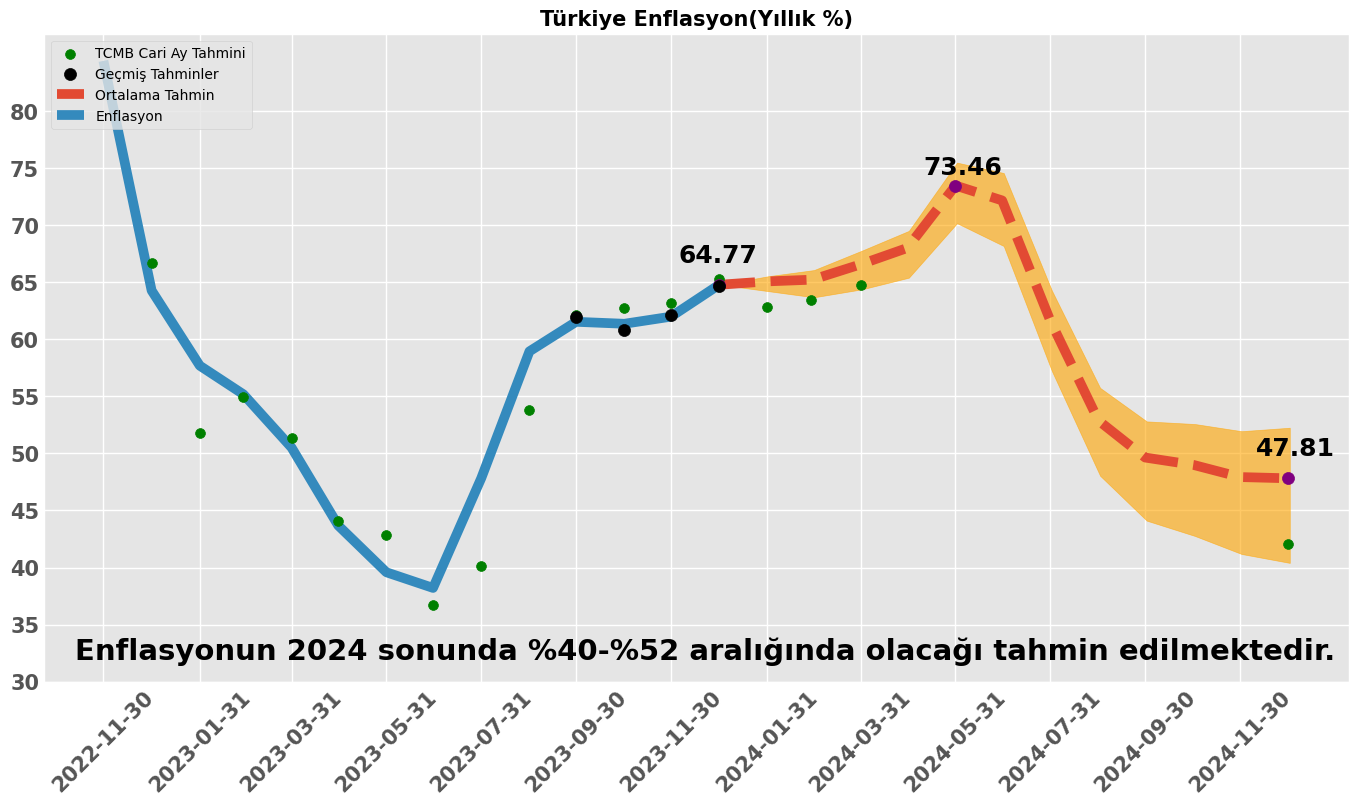

In [235]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('ggplot')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-02-28"),y=ay1sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=pd.to_datetime("2024-03-31"),y=ay2sonra["Enflasyon"],color="green",zorder=3,s=50)
plt.scatter(x=cariay[1:].index,y=cariay["Enflasyon"][1:].values,color="green",zorder=3,label='TCMB Cari Ay Tahmini',s=50)
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["12 Ay Sonrası"].values,color="green",zorder=3,s=50)
plt.scatter(x=yıllıktahmin.index[21:25],y=[61.94,60.84,62.13,64.71],color='black',zorder=4,label='Geçmiş Tahminler',s=75)
plt.scatter(x=yıllıktahmin.index[24],y=yıllıktahmin.iloc[24,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[29],y=yıllıktahmin.iloc[29,0],color='purple',zorder=3,s=75)
plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='purple',zorder=3,s=75)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
#plt.scatter(x=yıllıktahmin.index[36],y=yıllıktahmin.iloc[36,0],color='orange',zorder=3,s=50)
plt.plot(yıllıktahmin["Ortalama"].iloc[24:-1],'--',label="Ortalama Tahmin",linewidth=7)
plt.plot(yıllıktahmin["Ortalama"].iloc[11:25],label="Enflasyon",linewidth=7)
plt.fill_between(yıllıktahmin.iloc[24:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:].shift(1), yıllıktahmin["Minimum"].iloc[24:].shift(1), alpha=0.6, color='orange')
# Tarihi ekseni birimlerine dönüştürün
annotation_date = mdates.datestr2num('2025-01')
plt.text(mdates.datestr2num('2023-12'), float(sonu2023)+2, sonu2023, fontsize=18, color='black', horizontalalignment='center',fontweight='bold')
plt.text(mdates.datestr2num('2024-06'), float(tepe)+1, tepe, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(mdates.datestr2num('2025-01'), float(sonu2024)+2, sonu2024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2026-01'), float(sonu2024)-5, sonu2025, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
#plt.text(mdates.datestr2num('2025-12'), float(sonra24ay)+3, sonra24ay, fontsize=12, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 32, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[11:37:2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=2)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12')])

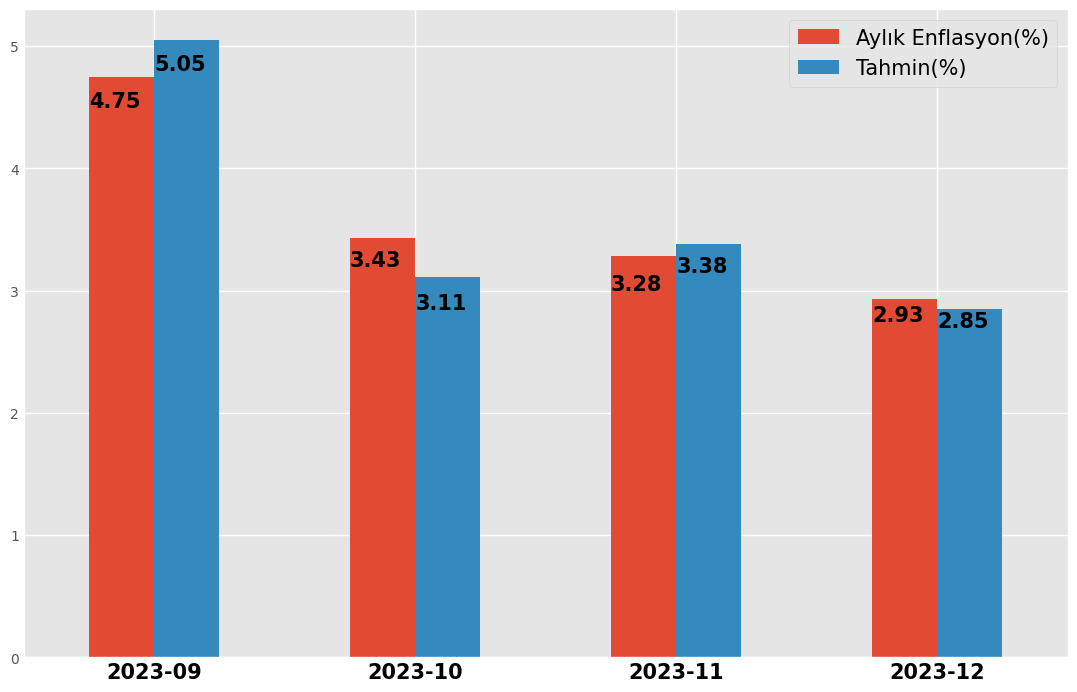

In [236]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93],"Tahmin(%)":[5.05,3.11,3.38,2.85]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=4,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.25,4.5),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,4.8),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.75,3.2),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,2.85),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.75,3),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,3.15),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.75,2.75),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,2.7),fontweight="bold",fontsize=15)

plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [237]:
aralık=aylıktahmin.iloc[0,-1]
aralık = "{:.2f}".format(aralık)
sonu2023=yıllıktahmin.loc["2023-12-31","Ortalama"]
sonu2023="{:.2f}".format(sonu2023)
sonu2024=yıllıktahmin.loc["2024-12-31","Ortalama"]
sonu2024="{:.2f}".format(sonu2024)


In [238]:
aylıktahmin

,SGD Regressor,Linear Regression,Lasso Regression,Lars Regression,Kernel Regression,Gaussian Regression,Bayessian Regression,LSTM,Robust Regression,Ortalama,Maksimum,Minimum
2024-01-31,6.899757,6.772608,6.772716,6.754687,7.140747,6.852732,6.844347,6.441013,7.098779,6.841932,7.140747,6.283417
2024-02-29,3.360923,3.153671,3.152158,3.251227,3.474820,3.320479,3.254825,2.968708,3.208612,3.238578,3.474820,2.811111
2024-03-31,3.183202,3.093039,3.082130,3.064899,3.344770,3.143453,3.087459,2.886807,3.190119,3.119879,3.344770,2.729210
2024-04-30,3.347678,3.206345,3.214466,3.175906,3.434992,3.252484,3.233571,3.256963,3.287408,3.267964,3.434992,3.018309
2024-05-31,3.440082,3.172020,3.136561,3.087302,3.573811,3.209175,3.212260,3.525562,3.347915,3.300759,3.573811,2.929705
2024-06-30,3.238369,3.054162,3.046123,2.858343,3.380848,3.111964,3.123172,3.257882,3.166599,3.137987,3.380848,2.700746
2024-07-31,2.893929,2.734184,2.763019,2.660823,3.027006,2.828626,2.752540,2.514065,2.902526,2.787090,3.027006,2.356468
2024-08-31,3.264147,3.133830,3.147960,3.134721,3.428789,3.240187,3.172380,2.880557,3.195339,3.178420,3.428789,2.722960
2024-09-30,2.637993,2.524167,2.523840,2.497204,2.776351,2.580992,2.471758,2.125964,2.690381,2.537753,2.776351,1.968367
2024-10-31,3.080355,2.972132,2.977000,2.915148,3.277676,3.007448,2.990693,2.628636,3.042087,2.989398,3.277676,2.471039


Text(10.75, 2.7090371841039906, '2.85')

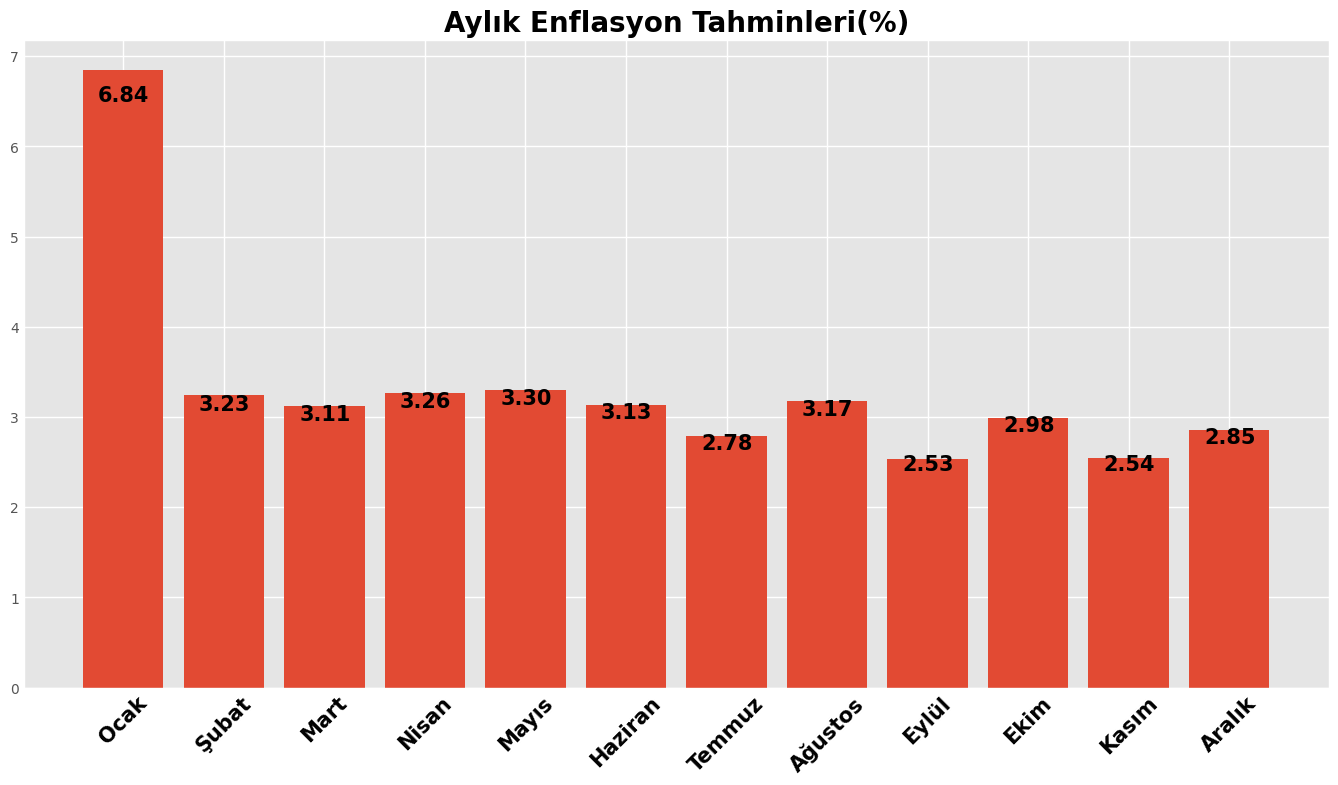

In [239]:
plt.figure(figsize=(15,8))
plt.bar(x=["Ocak","Şubat","Mart","Nisan","Mayıs","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık"],height=aylıktahmin.iloc[:-1,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-3])[:4],xy=(-0.25,aylıktahmin.iloc[0,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-3])[:4],xy=(0.75,aylıktahmin.iloc[1,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-3])[:4],xy=(1.75,aylıktahmin.iloc[2,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-3])[:4],xy=(2.75,aylıktahmin.iloc[3,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-3])[:4],xy=(3.75,aylıktahmin.iloc[4,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-3])[:4],xy=(4.75,aylıktahmin.iloc[5,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-3])[:4],xy=(5.75,aylıktahmin.iloc[6,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-3])[:4],xy=(6.75,aylıktahmin.iloc[7,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-3])[:4],xy=(7.75,aylıktahmin.iloc[8,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-3])[:4],xy=(8.75,aylıktahmin.iloc[9,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-3])[:4],xy=(9.75,aylıktahmin.iloc[10,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-3])[:4],xy=(10.75,aylıktahmin.iloc[11,-3]*0.95),fontweight="bold",fontsize=15)